# Exploratory Data Analysis

Here, we will create some visualizations to try and investigate any trends and/or patterns that may be useful to look into during our analysis. Keep in mind, our goal is to find out if excessive substance abuse has a correlation with development of mental illnesses and psychological distress. Whether one causes the other is yet to be seen, but we can certainly learn if the two are associated by exploring the data further. Once we establish this correlation, we can further investigate (perhaps using whether or not first use of the drug was at a young age) whether this drug use caused their psychological distress. Then, perhaps, we can use this as a reason to caution adolescents against using drugs. Or, if we find no definitive correlation/contribution, we can choose to focus our efforts to improve worldwide mental health elsewhere.

Let's import some modules that we may need first:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Now, let's import the cleaned data.

In [2]:
filename = 'drugAbuse_data_cleaned.csv'
df = pd.read_csv(filename)
df.head(7)

,Unnamed: 0,# Days Used Alcohol Past Year,# Days Used Cocaine Past Month,Major Depressive Episode in Past Year,# Days Used Marijuana Past Year (Range),Cocaine Abuse in Past Year,# Days Used Alcohol Past Month,# Days Used Cocaine Past Year,Severe Psychological Distress Past Month,# Days Used Marijuana Past Year,...,Psychological Distress Score in Worst Month of Past Year,# Days Used Hallucinogens Past Month (Range),# Days Used Hallucinogens Past Year (Range),Alcohol Recency,Marijuana Abuse in Past Year,# Days Binge Drank Past Month,First Used Alcohol Prior to 18,# Days Used Alcohol Past Year (Range),Marijuana Dependence in Past Year,# Days Used Alcohol Past Month (Range)
0,0,6,0.0,No,0,No,0.0,0,No,0,...,11.0,0,0,Between 30 Days and a Year Ago,No,0,No,1-11,No,0
1,1,120,0.0,No,0,No,8.0,0,No,0,...,8.0,0,0,Within Past 30 Days,No,1,Yes,100-299,No,6-19
2,2,84,0.0,No,0,No,3.0,0,No,0,...,0.0,0,0,Within Past 30 Days,No,2,No,50-99,No,3-5
3,3,12,0.0,No,0,No,0.0,0,No,0,...,4.0,0,0,Between 30 Days and a Year Ago,No,0,No,12-49,No,0
4,4,0,0.0,No,0,No,0.0,0,No,0,...,0.0,0,0,More than a Year Ago,No,0,Yes,0,No,0
5,5,0,0.0,No,0,No,0.0,0,No,0,...,0.0,0,0,Never Used,No,0,No,0,No,0
6,6,48,0.0,Yes,0,No,4.0,0,No,0,...,14.0,0,0,Within Past 30 Days,No,1,Yes,12-49,No,3-5


# Exploring Severe Psychological Distress

First, let's make some boxplots to compare how many days in the past year individuals used substances between those who did and did not have severe psychological distress in the past month.

Let's calculate some summary statistics to find out what our range should be for each column:

Since there are so many people who have done all of them 0 times in the past year, let's investigate all the people who have done the corresponding substance more than once.

In [3]:
# the subset of people who have used alcohol more than once in the past year
alcohol_done_more_than_once_year = df[df['# Days Used Alcohol Past Year']>0]
alcohol_done_more_than_once_year['# Days Used Alcohol Past Year'].describe()

count    10994.000000
mean        76.517464
std         80.581528
min          1.000000
25%         12.000000
50%         50.000000
75%        104.000000
max        365.000000
Name: # Days Used Alcohol Past Year, dtype: float64

In [4]:
# the subset of people who have used marijuana more than once in the past year
marijuana_done_more_than_once_year = df[df['# Days Used Marijuana Past Year']>0]
marijuana_done_more_than_once_year['# Days Used Marijuana Past Year'].describe()

count    4597.000000
mean      131.627148
std       134.499409
min         1.000000
25%         8.000000
50%        60.000000
75%       260.000000
max       365.000000
Name: # Days Used Marijuana Past Year, dtype: float64

In [5]:
# the subset of people who have used cocaine more than once in the past year
cocaine_done_more_than_once_year = df[df['# Days Used Cocaine Past Year']>0]
cocaine_done_more_than_once_year['# Days Used Cocaine Past Year'].describe()

count    714.000000
mean      22.691877
std       45.986586
min        1.000000
25%        2.000000
50%        5.000000
75%       19.750000
max      350.000000
Name: # Days Used Cocaine Past Year, dtype: float64

In [6]:
# the subset of people who have used hallucinogens more than once in the past year
halluc_done_more_than_once_year = df[df['# Days Used Hallucinogens Past Year']>0]
halluc_done_more_than_once_year['# Days Used Hallucinogens Past Year'].describe()

count    992.000000
mean      15.663306
std       39.593973
min        1.000000
25%        1.000000
50%        3.000000
75%       10.000000
max      365.000000
Name: # Days Used Hallucinogens Past Year, dtype: float64

/Users/rajsingh/anaconda2/lib/python2.7/site-packages/seaborn/categorical.py:462: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


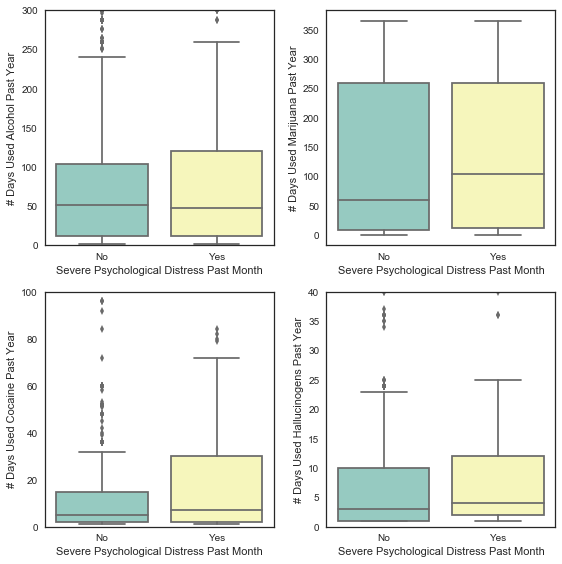

In [7]:
sns.set(style='white',palette='Set3')

# set up matplotlib subplots (we want four, one for alcohol, one for marijuana, one for cocaine,
# and one for hallucinogens
fig, axes = plt.subplots(2,2,figsize=(8,8))

# make boxplot for alcohol data
axes[0,0].set_ylim(0,300)
sns.boxplot(data=alcohol_done_more_than_once_year,x='Severe Psychological Distress Past Month',y='# Days Used Alcohol Past Year',ax=axes[0,0])

# make boxplot for marijuana data
sns.boxplot(data=marijuana_done_more_than_once_year,x='Severe Psychological Distress Past Month',y='# Days Used Marijuana Past Year',ax=axes[0,1])

axes[1,0].set_ylim(0,100)
# make boxplot for cocaine data
sns.boxplot(data=cocaine_done_more_than_once_year,x='Severe Psychological Distress Past Month',y='# Days Used Cocaine Past Year',ax=axes[1,0])

axes[1,1].set_ylim(0,40)
# make boxplot for hallucinogen data
sns.boxplot(data=halluc_done_more_than_once_year,x='Severe Psychological Distress Past Month',y='# Days Used Hallucinogens Past Year',ax=axes[1,1])

plt.tight_layout()
plt.show()

Keep in mind that each subset represented is a different subset, and each subset has individuals that have done the mentioned substance more than once. It seems that frequency of use for alcohol, cocaine, and hallucinogens don't have a strong correlation with severe psychological distress. Individuals with severe psychological distress do seem to have a higher frequency of marijuana usage in the past year.

Let's check if usage in the past month has any correlation with severe psychological distress in the past month. Once again, we will investigate people who have been users in the past month.

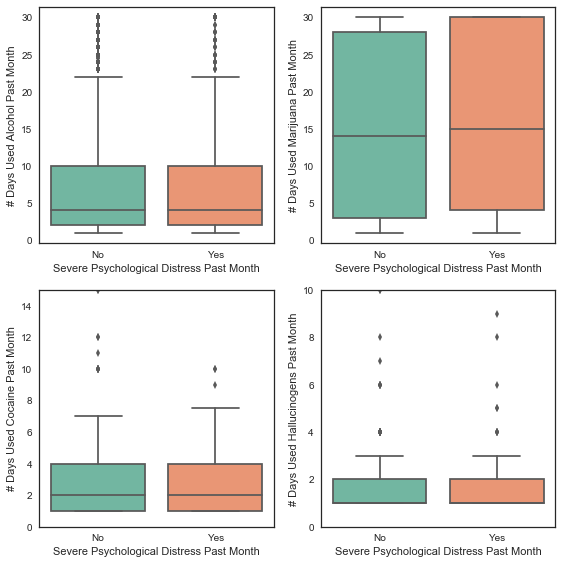

In [8]:
# creating new subsets
alcohol_done_more_than_once_month = df[df['# Days Used Alcohol Past Month']>0]
marijuana_done_more_than_once_month = df[df['# Days Used Marijuana Past Month']>0]
cocaine_done_more_than_once_month = df[df['# Days Used Cocaine Past Month']>0]
halluc_done_more_than_once_month = df[df['# Days Used Hallucinogens Past Month']>0]
sns.set(style='white',palette='Set2')

# set up matplotlib subplots (we want four, one for alcohol, one for marijuana, one for cocaine,
# and one for hallucinogens
fig, axes = plt.subplots(2,2,figsize=(8,8))

# make boxplot for alcohol data
sns.boxplot(data=alcohol_done_more_than_once_month,x='Severe Psychological Distress Past Month',y='# Days Used Alcohol Past Month',ax=axes[0,0])

# make boxplot for marijuana data
sns.boxplot(data=marijuana_done_more_than_once_month,x='Severe Psychological Distress Past Month',y='# Days Used Marijuana Past Month',ax=axes[0,1])

axes[1,0].set_ylim(0,15)
# make boxplot for cocaine data
sns.boxplot(data=cocaine_done_more_than_once_month,x='Severe Psychological Distress Past Month',y='# Days Used Cocaine Past Month',ax=axes[1,0])

axes[1,1].set_ylim(0,10)
# make boxplot for hallucinogen data
sns.boxplot(data=halluc_done_more_than_once_month,x='Severe Psychological Distress Past Month',y='# Days Used Hallucinogens Past Month',ax=axes[1,1])

plt.tight_layout()
plt.show()

As we can see, the medians show roughly the same results that the per year statistics showed. In this case, however, frequency of marijuana usage played a smaller part than it did in the per year statistics.

Now, let's take the subset of people with severe psychological distress in the past month, and make some comparisons with that data. Once again, we will also be subsetting the people that have used the substance at least once in the past year.

In [9]:
psychological_distress_df_alcohol = alcohol_done_more_than_once_year[alcohol_done_more_than_once_year['Severe Psychological Distress Past Month']=='Yes']
psychological_distress_df_marijuana = marijuana_done_more_than_once_year[marijuana_done_more_than_once_year['Severe Psychological Distress Past Month']=='Yes']
psychological_distress_df_cocaine = cocaine_done_more_than_once_year[cocaine_done_more_than_once_year['Severe Psychological Distress Past Month']=='Yes']
psychological_distress_df_halluc = halluc_done_more_than_once_year[halluc_done_more_than_once_year['Severe Psychological Distress Past Month']=='Yes']

Let's see if we can make any deductions based on whether or not they have abused certain substances in the past.

/Users/rajsingh/anaconda2/lib/python2.7/site-packages/seaborn/categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


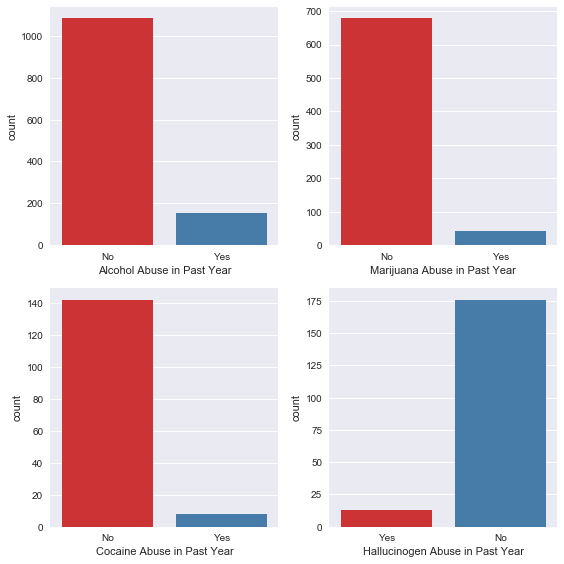

In [10]:
sns.set(style='darkgrid',palette='Set1')
# create some countplots based on whether individual has abused the drug in the past.

fig, axes = plt.subplots(2,2,figsize=(8,8))

# make countplot for alcohol data
sns.countplot(data=psychological_distress_df_alcohol,x='Alcohol Abuse in Past Year',ax=axes[0,0])

# make countplot for marijuana data
sns.countplot(data=psychological_distress_df_marijuana,x='Marijuana Abuse in Past Year',ax=axes[0,1])

# make countplot for cocaine data
sns.countplot(data=psychological_distress_df_cocaine,x='Cocaine Abuse in Past Year',ax=axes[1,0])

# make countplot for hallucinogen data
sns.countplot(data=psychological_distress_df_halluc,x='Hallucinogen Abuse in Past Year',ax=axes[1,1])

plt.tight_layout()
plt.show()

Out of the people with psychological distress, for each category, most of the individuals have not abused the drugs. Let's create some more plots with percentages to further illustrate.

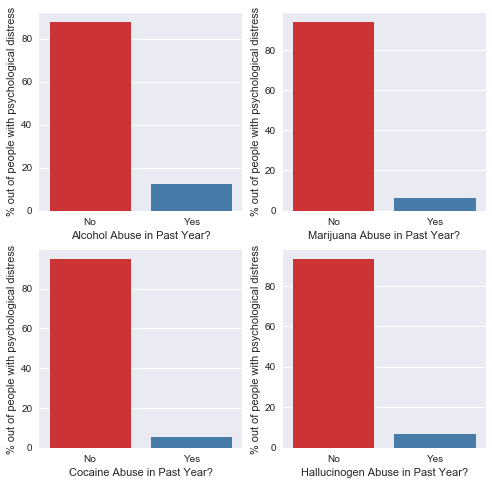

In [11]:
# creating DFs to represent the percentage of people who have abused the substance in the past year OUT
# of the people who have had severe psychological distress
alcohol_percent_df = psychological_distress_df_alcohol['Alcohol Abuse in Past Year'].value_counts().reset_index()
alcohol_percent_df['Alcohol Abuse in Past Year (%)']= alcohol_percent_df['Alcohol Abuse in Past Year']/float(alcohol_percent_df['Alcohol Abuse in Past Year'].sum()) * 100

marijuana_percent_df = psychological_distress_df_marijuana['Marijuana Abuse in Past Year'].value_counts().reset_index()
marijuana_percent_df['Marijuana Abuse in Past Year (%)']= marijuana_percent_df['Marijuana Abuse in Past Year']/float(marijuana_percent_df['Marijuana Abuse in Past Year'].sum()) * 100

cocaine_percent_df = psychological_distress_df_cocaine['Cocaine Abuse in Past Year'].value_counts().reset_index()
cocaine_percent_df['Cocaine Abuse in Past Year (%)']= cocaine_percent_df['Cocaine Abuse in Past Year']/float(cocaine_percent_df['Cocaine Abuse in Past Year'].sum()) * 100

halluc_percent_df = psychological_distress_df_halluc['Hallucinogen Abuse in Past Year'].value_counts().reset_index()
halluc_percent_df['Hallucinogen Abuse in Past Year (%)']= halluc_percent_df['Hallucinogen Abuse in Past Year']/float(halluc_percent_df['Hallucinogen Abuse in Past Year'].sum()) * 100

sns.set(style='darkgrid',palette='Set1')
fig, axes = plt.subplots(2,2,figsize=(8,8))

sns.barplot(data=alcohol_percent_df,x='index',y='Alcohol Abuse in Past Year (%)',ci=None,ax=axes[0,0])
axes[0,0].set_xlabel("Alcohol Abuse in Past Year?")
axes[0,0].set_ylabel("% out of people with psychological distress")

sns.barplot(data=marijuana_percent_df,x='index',y='Marijuana Abuse in Past Year (%)',ci=None,ax=axes[0,1])
axes[0,1].set_xlabel("Marijuana Abuse in Past Year?")
axes[0,1].set_ylabel("% out of people with psychological distress")

sns.barplot(data=cocaine_percent_df,x='index',y='Cocaine Abuse in Past Year (%)',ci=None,ax=axes[1,0])
axes[1,0].set_xlabel("Cocaine Abuse in Past Year?")
axes[1,0].set_ylabel("% out of people with psychological distress")

sns.barplot(data=halluc_percent_df,x='index',y='Hallucinogen Abuse in Past Year (%)',ci=None,ax=axes[1,1],order=['No','Yes'])
axes[1,1].set_xlabel("Hallucinogen Abuse in Past Year?")
axes[1,1].set_ylabel("% out of people with psychological distress")

plt.show()


There isn't really a particularly high percentage for any of them. However, we haven't really compared this to the percentage of people in the non-severe psychological distress group who have abused each substance in the past year. Let's do those comparisons now. Notice that our approach is very similar to when we did so with the subset of people with severe psychological distress.

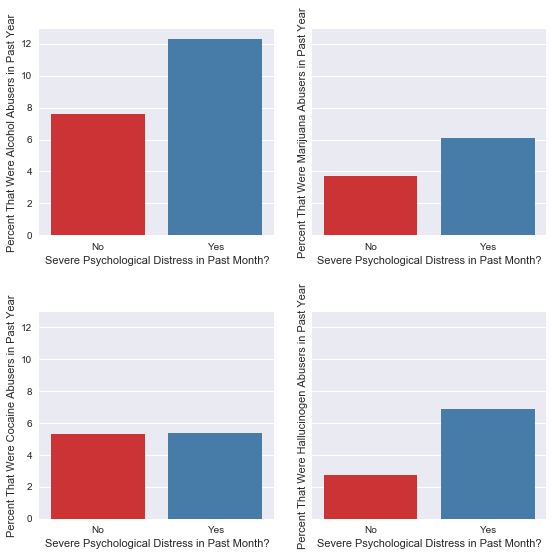

In [12]:
# creating variables to represent the percentage of people OUT of the people with psychological distress 
# that have abused the substance 
percent_alcohol_abuse_psychological_distress = alcohol_percent_df.loc[1,'Alcohol Abuse in Past Year (%)']
percent_marijuana_abuse_psychological_distress = marijuana_percent_df.loc[1,'Marijuana Abuse in Past Year (%)']
percent_cocaine_abuse_psychological_distress = cocaine_percent_df.loc[1,'Cocaine Abuse in Past Year (%)']
percent_halluc_abuse_psychological_distress = halluc_percent_df.loc[1,'Hallucinogen Abuse in Past Year (%)']

# create the df to represent people who have done the substance once but have not had severe psychological distress
# in the past month
no_psychological_distress_df_alcohol = alcohol_done_more_than_once_year[alcohol_done_more_than_once_year['Severe Psychological Distress Past Month']=='No']
no_psychological_distress_df_marijuana = marijuana_done_more_than_once_year[marijuana_done_more_than_once_year['Severe Psychological Distress Past Month']=='No']
no_psychological_distress_df_cocaine = cocaine_done_more_than_once_year[cocaine_done_more_than_once_year['Severe Psychological Distress Past Month']=='No']
no_psychological_distress_df_halluc = halluc_done_more_than_once_year[halluc_done_more_than_once_year['Severe Psychological Distress Past Month']=='No']

# create dataframes to represent percentage of people who have abused the substance 
# OUT OF the people with NO severe psychological distress
alcohol_percent_df_noPD = no_psychological_distress_df_alcohol['Alcohol Abuse in Past Year'].value_counts().reset_index()
alcohol_percent_df_noPD['Alcohol Abuse in Past Year (%)']= alcohol_percent_df_noPD['Alcohol Abuse in Past Year']/float(alcohol_percent_df_noPD['Alcohol Abuse in Past Year'].sum()) * 100

marijuana_percent_df_noPD = no_psychological_distress_df_marijuana['Marijuana Abuse in Past Year'].value_counts().reset_index()
marijuana_percent_df_noPD['Marijuana Abuse in Past Year (%)']= marijuana_percent_df_noPD['Marijuana Abuse in Past Year']/float(marijuana_percent_df_noPD['Marijuana Abuse in Past Year'].sum()) * 100

cocaine_percent_df_noPD = no_psychological_distress_df_cocaine['Cocaine Abuse in Past Year'].value_counts().reset_index()
cocaine_percent_df_noPD['Cocaine Abuse in Past Year (%)']= cocaine_percent_df_noPD['Cocaine Abuse in Past Year']/float(cocaine_percent_df_noPD['Cocaine Abuse in Past Year'].sum()) * 100

halluc_percent_df_noPD = no_psychological_distress_df_halluc['Hallucinogen Abuse in Past Year'].value_counts().reset_index()
halluc_percent_df_noPD['Hallucinogen Abuse in Past Year (%)']= halluc_percent_df_noPD['Hallucinogen Abuse in Past Year']/float(halluc_percent_df_noPD['Hallucinogen Abuse in Past Year'].sum()) * 100

percent_alcohol_abuse_no_psychological_distress = alcohol_percent_df_noPD.loc[1,'Alcohol Abuse in Past Year (%)']
percent_marijuana_abuse_no_psychological_distress = marijuana_percent_df_noPD.loc[1,'Marijuana Abuse in Past Year (%)']
percent_cocaine_abuse_no_psychological_distress = cocaine_percent_df_noPD.loc[1,'Cocaine Abuse in Past Year (%)']
percent_halluc_abuse_no_psychological_distress = halluc_percent_df_noPD.loc[1,'Hallucinogen Abuse in Past Year (%)']

# make the comparison DataFrames manually
alcohol_abuse_comparison_df = pd.DataFrame([{'Severe Psychological Distress in Past Month?':'No','Percent That Were Alcohol Abusers in Past Year':percent_alcohol_abuse_no_psychological_distress},
                                           {'Severe Psychological Distress in Past Month?':'Yes','Percent That Were Alcohol Abusers in Past Year':percent_alcohol_abuse_psychological_distress}])
marijuana_abuse_comparison_df = pd.DataFrame([{'Severe Psychological Distress in Past Month?':'No','Percent That Were Marijuana Abusers in Past Year':percent_marijuana_abuse_no_psychological_distress},
                                           {'Severe Psychological Distress in Past Month?':'Yes','Percent That Were Marijuana Abusers in Past Year':percent_marijuana_abuse_psychological_distress}])
cocaine_abuse_comparison_df = pd.DataFrame([{'Severe Psychological Distress in Past Month?':'No','Percent That Were Cocaine Abusers in Past Year':percent_cocaine_abuse_no_psychological_distress},
                                           {'Severe Psychological Distress in Past Month?':'Yes','Percent That Were Cocaine Abusers in Past Year':percent_cocaine_abuse_psychological_distress}])
halluc_abuse_comparison_df = pd.DataFrame([{'Severe Psychological Distress in Past Month?':'No','Percent That Were Hallucinogen Abusers in Past Year':percent_halluc_abuse_no_psychological_distress},
                                           {'Severe Psychological Distress in Past Month?':'Yes','Percent That Were Hallucinogen Abusers in Past Year':percent_halluc_abuse_psychological_distress}])
#make visualizations
sns.set(style='darkgrid',palette='Set1')
fig, axes = plt.subplots(2,2,figsize=(8,8),sharey=True)
sns.barplot(data=alcohol_abuse_comparison_df,x='Severe Psychological Distress in Past Month?',y='Percent That Were Alcohol Abusers in Past Year',ci=None,ax=axes[0,0])
sns.barplot(data=marijuana_abuse_comparison_df,x='Severe Psychological Distress in Past Month?',y='Percent That Were Marijuana Abusers in Past Year',ci=None,ax=axes[0,1])
sns.barplot(data=cocaine_abuse_comparison_df,x='Severe Psychological Distress in Past Month?',y='Percent That Were Cocaine Abusers in Past Year',ci=None,ax=axes[1,0])
sns.barplot(data=halluc_abuse_comparison_df,x='Severe Psychological Distress in Past Month?',y='Percent That Were Hallucinogen Abusers in Past Year',ci=None,ax=axes[1,1])
plt.tight_layout()
plt.show()

As we can see, for all substances, there is a higher percentage of abusers amongst those with severe psychological distress in the past month.

Let's see if we can find any patterns in whether or not the individual tried the drug prior to 18 years old. We will compare the counts between the people with severe psychological distress and without psychological distress in the past month.

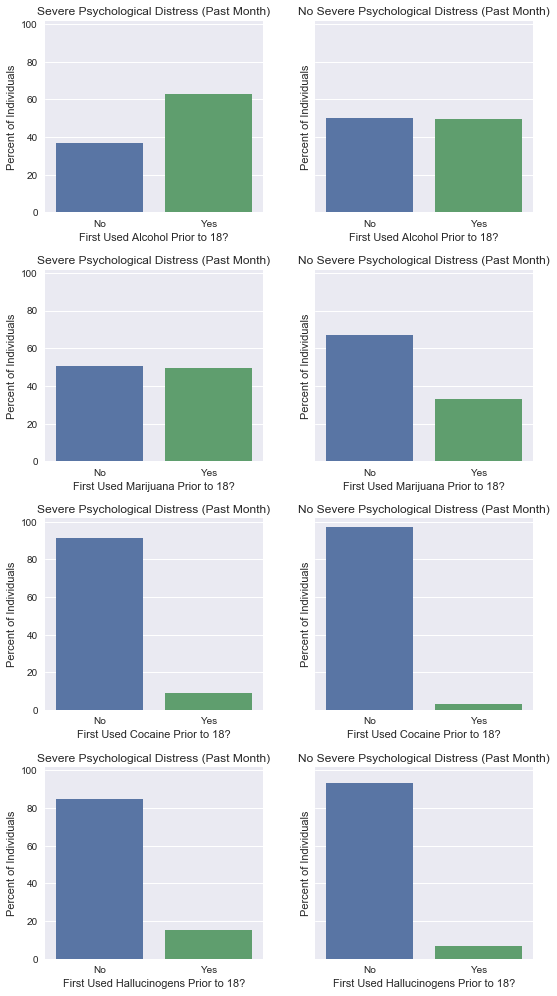

In [13]:
# getting the subsets of people that have had psychological distress in the past month and compare
psychological_distress_df = df[df['Severe Psychological Distress Past Month']=='Yes']
no_psychological_distress_df = df[df['Severe Psychological Distress Past Month']=='No']

# subplots to compare 
fig, axes = plt.subplots(4,2,figsize=(8,14),sharey=True)


# create a new dataframe with the percentages - those who used alcohol prior to 18 with severe pscychological distress

alcohol_prior_to18_percent_PD = psychological_distress_df['First Used Alcohol Prior to 18'].value_counts().reset_index()
alcohol_sum_PD = float(alcohol_prior_to18_percent_PD['First Used Alcohol Prior to 18'].sum())
alcohol_prior_to18_percent_PD['First Used Alcohol Prior to 18'] = alcohol_prior_to18_percent_PD['First Used Alcohol Prior to 18'].map(lambda a:(a/alcohol_sum_PD) * 100)

# set styles and labels for 1st subplot

sns.set(style='darkgrid')
sns.barplot(data=alcohol_prior_to18_percent_PD,x='index',
            y='First Used Alcohol Prior to 18',ax=axes[0,0],order=['No','Yes'])
axes[0,0].set_title('Severe Psychological Distress (Past Month)')
axes[0,0].set_xlabel('First Used Alcohol Prior to 18?')
axes[0,0].set_ylabel('Percent of Individuals')

# create new dataframe with percentages - those who used alcohol prior to 18 without severe psychological distress

alcohol_prior_to18_percent_noPD = no_psychological_distress_df['First Used Alcohol Prior to 18'].value_counts().reset_index()
alcohol_sum_noPD = float(alcohol_prior_to18_percent_noPD['First Used Alcohol Prior to 18'].sum())

alcohol_prior_to18_percent_noPD['First Used Alcohol Prior to 18'] = alcohol_prior_to18_percent_noPD['First Used Alcohol Prior to 18'].map(lambda a:(a/alcohol_sum_noPD) * 100)
# set styles and labels for 2nd subplot

sns.set(style='darkgrid')
sns.barplot(data=alcohol_prior_to18_percent_noPD,x='index',y='First Used Alcohol Prior to 18'
            ,ax=axes[0,1],order=['No','Yes'])
axes[0,1].set_title('No Severe Psychological Distress (Past Month)')
axes[0,1].set_xlabel('First Used Alcohol Prior to 18?')
axes[0,1].set_ylabel('Percent of Individuals')

# create new dataframe with percentages - those who used marijuana prior to 18 with severe psychological distress

marijuana_prior_to18_percent_PD = psychological_distress_df['First Used Marijuana Prior to 18'].value_counts().reset_index()
marijuana_sum_PD = float(marijuana_prior_to18_percent_PD['First Used Marijuana Prior to 18'].sum())
marijuana_prior_to18_percent_PD['First Used Marijuana Prior to 18'] = marijuana_prior_to18_percent_PD['First Used Marijuana Prior to 18'].map(lambda a:(a/marijuana_sum_PD) * 100)

# set styles and labels for 3rd subplot 

sns.set(style='darkgrid')
sns.barplot(data=marijuana_prior_to18_percent_PD,x='index',y='First Used Marijuana Prior to 18'
            ,ax=axes[1,0],order=['No','Yes'])
axes[1,0].set_title('Severe Psychological Distress (Past Month)')
axes[1,0].set_xlabel('First Used Marijuana Prior to 18?')
axes[1,0].set_ylabel('Percent of Individuals')

# create new dataframe with percentages - those who used marijuana prior to 18 without severe psychological distress

marijuana_prior_to18_percent_noPD = no_psychological_distress_df['First Used Marijuana Prior to 18'].value_counts().reset_index()
marijuana_sum_noPD = float(marijuana_prior_to18_percent_noPD['First Used Marijuana Prior to 18'].sum())
marijuana_prior_to18_percent_noPD['First Used Marijuana Prior to 18'] = marijuana_prior_to18_percent_noPD['First Used Marijuana Prior to 18'].map(lambda a:(a/marijuana_sum_noPD) * 100)

# set styles and labels for 4th subplot

sns.set(style='darkgrid')
sns.barplot(data=marijuana_prior_to18_percent_noPD,x='index',y='First Used Marijuana Prior to 18',
           ax=axes[1,1],order=['No','Yes'])
axes[1,1].set_title('No Severe Psychological Distress (Past Month)')
axes[1,1].set_xlabel('First Used Marijuana Prior to 18?')
axes[1,1].set_ylabel('Percent of Individuals')

# create new dataframe with percentages - those who used cocaine prior to 18 with severe psychological distress

cocaine_prior_to18_percent_PD = psychological_distress_df['First Used Cocaine Prior to 18'].value_counts().reset_index()
cocaine_sum_PD = float(cocaine_prior_to18_percent_PD['First Used Cocaine Prior to 18'].sum())
cocaine_prior_to18_percent_PD['First Used Cocaine Prior to 18'] = cocaine_prior_to18_percent_PD['First Used Cocaine Prior to 18'].map(lambda a:(a/cocaine_sum_PD) * 100)

# set styles and labels for 5th subplot
sns.set(style='darkgrid')
sns.barplot(data=cocaine_prior_to18_percent_PD,x='index',y='First Used Cocaine Prior to 18',
           ax=axes[2,0],order=['No','Yes'])
axes[2,0].set_title('Severe Psychological Distress (Past Month)')
axes[2,0].set_xlabel('First Used Cocaine Prior to 18?')
axes[2,0].set_ylabel('Percent of Individuals')

# create new dataframe with percentages - those who used cocaine prior to 18 without severe psychological distress
cocaine_prior_to18_percent_noPD = no_psychological_distress_df['First Used Cocaine Prior to 18'].value_counts().reset_index()
cocaine_sum_noPD = float(cocaine_prior_to18_percent_noPD['First Used Cocaine Prior to 18'].sum())
cocaine_prior_to18_percent_noPD['First Used Cocaine Prior to 18'] = cocaine_prior_to18_percent_noPD['First Used Cocaine Prior to 18'].map(lambda a:(a/cocaine_sum_noPD) * 100)

# set styles and labels for 6th subplot
sns.set(style='darkgrid')
sns.barplot(data=cocaine_prior_to18_percent_noPD,x='index',y='First Used Cocaine Prior to 18',
           ax=axes[2,1],order=['No','Yes'])
axes[2,1].set_title('No Severe Psychological Distress (Past Month)')
axes[2,1].set_xlabel('First Used Cocaine Prior to 18?')
axes[2,1].set_ylabel('Percent of Individuals')

# create new dataframe with percentages - those who used hallucinogens prior to 18 with severe psychological distress

halluc_prior_to18_percent_PD = psychological_distress_df['First Used Hallucinogens Prior to 18'].value_counts().reset_index()
halluc_sum_PD = float(halluc_prior_to18_percent_PD['First Used Hallucinogens Prior to 18'].sum())
halluc_prior_to18_percent_PD['First Used Hallucinogens Prior to 18'] = halluc_prior_to18_percent_PD['First Used Hallucinogens Prior to 18'].map(lambda a:(a/halluc_sum_PD) * 100)

# set styles and labels for 7th subplot
sns.set(style='darkgrid')
sns.barplot(data=halluc_prior_to18_percent_PD,x='index',y='First Used Hallucinogens Prior to 18',
           ax=axes[3,0],order=['No','Yes'])
axes[3,0].set_title('Severe Psychological Distress (Past Month)')
axes[3,0].set_xlabel('First Used Hallucinogens Prior to 18?')
axes[3,0].set_ylabel('Percent of Individuals')

# create new dataframe with percentages - those who used hallucinogens prior to 18 without severe psychological distress

halluc_prior_to18_percent_noPD = no_psychological_distress_df['First Used Hallucinogens Prior to 18'].value_counts().reset_index()
halluc_sum_noPD = float(halluc_prior_to18_percent_noPD['First Used Hallucinogens Prior to 18'].sum())
halluc_prior_to18_percent_noPD['First Used Hallucinogens Prior to 18'] = halluc_prior_to18_percent_noPD['First Used Hallucinogens Prior to 18'].map(lambda a:(a/halluc_sum_noPD) * 100)

# set styles and labels for 8th subplot
sns.set(style='darkgrid')
sns.barplot(data=halluc_prior_to18_percent_noPD,x='index',y='First Used Hallucinogens Prior to 18',
           ax=axes[3,1],order=['No','Yes'])
axes[3,1].set_title('No Severe Psychological Distress (Past Month)')
axes[3,1].set_xlabel('First Used Hallucinogens Prior to 18?')
axes[3,1].set_ylabel('Percent of Individuals')

plt.tight_layout()
plt.show()


These subplots provide more interesting results. In every case, there is a higher percentage of people that have tried the substance prior to 18 within the subset of people that have had psychological distress in the past year.

# Exploring those with Major Depressive Episodes (MDEs) in Past Year

Let's start to go more in depth regarding alcohol and marijuana usage. Let's see the percent of individuals that have been abusers of the substances in the past year in the corresponding subsets of people with and without major depressive episodes in the past year. We will take the same approach that we did with severe psychological distress.

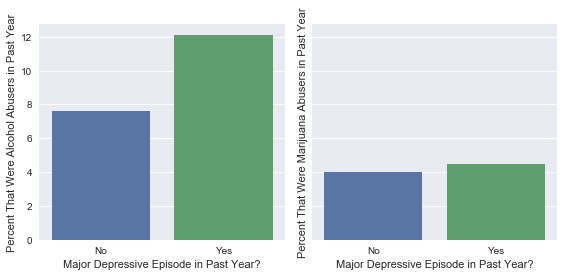

In [14]:
# create dataframes to subset the amount of people that have done each substance more than once that have had a depressive episode in the past year
major_depressive_df_alcohol = alcohol_done_more_than_once_year[alcohol_done_more_than_once_year['Major Depressive Episode in Past Year']=='Yes']
major_depressive_df_marijuana = marijuana_done_more_than_once_year[marijuana_done_more_than_once_year['Major Depressive Episode in Past Year']=='Yes']

# create dataframes to represent the percentages of people that have abused the substance out of people with major depressive episodes.
alcohol_percent_df_MD = major_depressive_df_alcohol['Alcohol Abuse in Past Year'].value_counts().reset_index()
alcohol_percent_df_MD['Alcohol Abuse in Past Year (%)']= alcohol_percent_df_MD['Alcohol Abuse in Past Year']/float(alcohol_percent_df_MD['Alcohol Abuse in Past Year'].sum()) * 100

marijuana_percent_df_MD = major_depressive_df_marijuana['Marijuana Abuse in Past Year'].value_counts().reset_index()
marijuana_percent_df_MD['Marijuana Abuse in Past Year (%)']= marijuana_percent_df_MD['Marijuana Abuse in Past Year']/float(marijuana_percent_df_MD['Marijuana Abuse in Past Year'].sum()) * 100

# creating variables to represent the percentage of people OUT of the people with MDE's in past year
# that have abused the substance 
percent_alcohol_abuse_major_depressive = alcohol_percent_df_MD.loc[1,'Alcohol Abuse in Past Year (%)']
percent_marijuana_abuse_major_depressive = marijuana_percent_df_MD.loc[1,'Marijuana Abuse in Past Year (%)']

# create the df to represent people who have done the substance once but have not had MDE's
# in past year
no_major_depressive_df_alcohol = alcohol_done_more_than_once_year[alcohol_done_more_than_once_year['Major Depressive Episode in Past Year']=='No']
no_major_depressive_df_marijuana = marijuana_done_more_than_once_year[marijuana_done_more_than_once_year['Major Depressive Episode in Past Year']=='No']

# create dataframes to represent the percentages of people that have abused the substance out of people without major depressive episodes.
alcohol_percent_df_noMD = no_major_depressive_df_alcohol['Alcohol Abuse in Past Year'].value_counts().reset_index()
alcohol_percent_df_noMD['Alcohol Abuse in Past Year (%)']= alcohol_percent_df_noMD['Alcohol Abuse in Past Year']/float(alcohol_percent_df_noMD['Alcohol Abuse in Past Year'].sum()) * 100

marijuana_percent_df_noMD = no_major_depressive_df_marijuana['Marijuana Abuse in Past Year'].value_counts().reset_index()
marijuana_percent_df_noMD['Marijuana Abuse in Past Year (%)']= marijuana_percent_df_noMD['Marijuana Abuse in Past Year']/float(marijuana_percent_df_noMD['Marijuana Abuse in Past Year'].sum()) * 100

# creating variables to represent the percentage of people OUT of the people with no MDE's in past year
# that have abused the substance 
percent_alcohol_abuse_no_major_depressive = alcohol_percent_df_noMD.loc[1,'Alcohol Abuse in Past Year (%)']
percent_marijuana_abuse_no_major_depressive = marijuana_percent_df_noMD.loc[1,'Marijuana Abuse in Past Year (%)']

# make the comparison DataFrames manually
alcohol_abuse_comparison_MDE_df = pd.DataFrame([{'Major Depressive Episode in Past Year?':'No','Percent That Were Alcohol Abusers in Past Year':percent_alcohol_abuse_no_major_depressive},
                                           {'Major Depressive Episode in Past Year?':'Yes','Percent That Were Alcohol Abusers in Past Year':percent_alcohol_abuse_major_depressive}])
marijuana_abuse_comparison_MDE_df = pd.DataFrame([{'Major Depressive Episode in Past Year?':'No','Percent That Were Marijuana Abusers in Past Year':percent_marijuana_abuse_no_major_depressive},
                                           {'Major Depressive Episode in Past Year?':'Yes','Percent That Were Marijuana Abusers in Past Year':percent_marijuana_abuse_major_depressive}])


fig, axes = plt.subplots(1,2,figsize=(8,4),sharey=True)
sns.barplot(data=alcohol_abuse_comparison_MDE_df,x='Major Depressive Episode in Past Year?',y='Percent That Were Alcohol Abusers in Past Year',ci=None,ax=axes[0])
sns.barplot(data=marijuana_abuse_comparison_MDE_df,x='Major Depressive Episode in Past Year?',y='Percent That Were Marijuana Abusers in Past Year',ci=None,ax=axes[1])
plt.tight_layout()
plt.show()

With alcohol, we see that there is a higher percentage of people that were alcohol abusers amongst those with major depressive episodes in the past year. With marijuana, there is a slightly higher percentage.

Now, let's explore the # of days that people have used alcohol and/or marijuana in the past month and compare it between people who have had and not had MDE's in the past year:

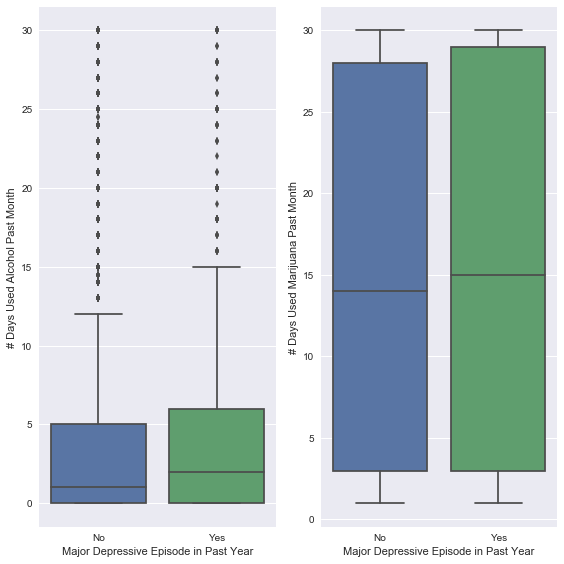

In [15]:
fig, axes = plt.subplots(1,2,figsize=(8,8))

# make boxplot for alcohol data
sns.boxplot(data=df,x='Major Depressive Episode in Past Year',y='# Days Used Alcohol Past Month',ax=axes[0])

# make boxplot for marijuana data
sns.boxplot(data=marijuana_done_more_than_once_month,x='Major Depressive Episode in Past Year',y='# Days Used Marijuana Past Month',ax=axes[1])
#axes[1].set_ylim([0,5])

plt.tight_layout()
plt.show() 

Keep in mind, this time we used the dataset that included ALL people for alcohol, not just people who used it more than once in the past month.We did this because marijuana usage is more uncommon and so using the entire dataset wouldn't be able to show many interesting conclusions. There seems to be a higher amount of people who use both alcohol and marijuana in the past month for people with MDE's in the past year.

Let's make the same comparison with use of the substances in the past year.

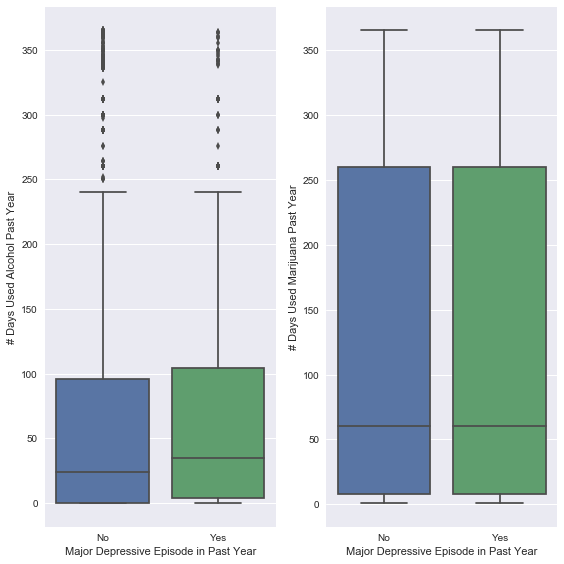

In [16]:
fig, axes = plt.subplots(1,2,figsize=(8,8))

# make boxplot for alcohol data
sns.boxplot(data=df,x='Major Depressive Episode in Past Year',y='# Days Used Alcohol Past Year',ax=axes[0])

# make boxplot for marijuana data
sns.boxplot(data=marijuana_done_more_than_once_year,x='Major Depressive Episode in Past Year',y='# Days Used Marijuana Past Year',ax=axes[1])

plt.tight_layout()
plt.show()

In the past year, there seems to be a slightly higher number of days used alcohol for people with MDE's in the past year. With marijuana, the use is about the same.

# Exploring those with mental illnesses in the past year

# Moderate or Serious Mental Illness

Let's take the same approach to compare subsets of people with either a moderate or severe mental illness in the past year:

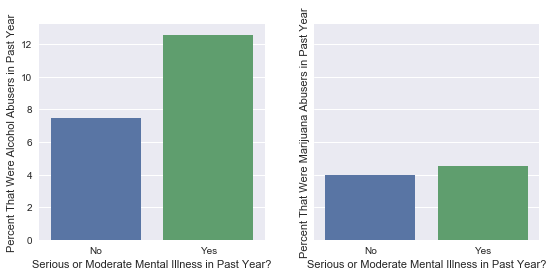

In [17]:
# create dataframes to subset the amount of people that have done each substance more than once that have had either a moderate or severe mental illness.
serious_or_moderateMI_df_alcohol = alcohol_done_more_than_once_year[(alcohol_done_more_than_once_year['Serious Mental Illness in Past Year']=='Yes') | (alcohol_done_more_than_once_year['Moderate Mental Illness in Past Year']=='Yes')]
serious_or_moderateMI_df_marijuana = marijuana_done_more_than_once_year[(marijuana_done_more_than_once_year['Serious Mental Illness in Past Year']=='Yes') | (marijuana_done_more_than_once_year['Moderate Mental Illness in Past Year']=='Yes')]

# create dataframes to represent the percentages of people that have abused the substance out of people with serious or moderate MI's in past year
alcohol_percent_df_SOMMI = serious_or_moderateMI_df_alcohol['Alcohol Abuse in Past Year'].value_counts().reset_index()
alcohol_percent_df_SOMMI['Alcohol Abuse in Past Year (%)']= alcohol_percent_df_SOMMI['Alcohol Abuse in Past Year']/float(alcohol_percent_df_SOMMI['Alcohol Abuse in Past Year'].sum()) * 100

marijuana_percent_df_SOMMI = serious_or_moderateMI_df_marijuana['Marijuana Abuse in Past Year'].value_counts().reset_index()
marijuana_percent_df_SOMMI['Marijuana Abuse in Past Year (%)']= marijuana_percent_df_SOMMI['Marijuana Abuse in Past Year']/float(marijuana_percent_df_SOMMI['Marijuana Abuse in Past Year'].sum()) * 100

# creating variables to represent the percentage of people OUT of the people with serious or moderate MI's in past year
# that have abused the substance 
percent_alcohol_abuse_SOMMI = alcohol_percent_df_SOMMI.loc[1,'Alcohol Abuse in Past Year (%)']
percent_marijuana_abuse_SOMMI = marijuana_percent_df_SOMMI.loc[1,'Marijuana Abuse in Past Year (%)']

# create the df to represent people who have done the substance once but have not had serious or moderate MI's
# in past year
no_serious_or_moderateMI_df_alcohol = alcohol_done_more_than_once_year[(alcohol_done_more_than_once_year['Serious Mental Illness in Past Year']=='No') & (alcohol_done_more_than_once_year['Moderate Mental Illness in Past Year']=='No')]
no_serious_or_moderateMI_df_marijuana = marijuana_done_more_than_once_year[(marijuana_done_more_than_once_year['Serious Mental Illness in Past Year']=='No') & (marijuana_done_more_than_once_year['Moderate Mental Illness in Past Year']=='No')]

# create dataframes to represent the percentages of people that have abused the substance out of people without SOMMI's
alcohol_percent_df_noSOMMI = no_serious_or_moderateMI_df_alcohol['Alcohol Abuse in Past Year'].value_counts().reset_index()
alcohol_percent_df_noSOMMI['Alcohol Abuse in Past Year (%)']= alcohol_percent_df_noSOMMI['Alcohol Abuse in Past Year']/float(alcohol_percent_df_noSOMMI['Alcohol Abuse in Past Year'].sum()) * 100

marijuana_percent_df_noSOMMI = no_serious_or_moderateMI_df_marijuana['Marijuana Abuse in Past Year'].value_counts().reset_index()
marijuana_percent_df_noSOMMI['Marijuana Abuse in Past Year (%)']= marijuana_percent_df_noSOMMI['Marijuana Abuse in Past Year']/float(marijuana_percent_df_noSOMMI['Marijuana Abuse in Past Year'].sum()) * 100

# creating variables to represent the percentage of people OUT of the people with no SOMMI's in past year
# that have abused the substance 
percent_alcohol_abuse_noSOMMI = alcohol_percent_df_noSOMMI.loc[1,'Alcohol Abuse in Past Year (%)']
percent_marijuana_abuse_noSOMMI = marijuana_percent_df_noSOMMI.loc[1,'Marijuana Abuse in Past Year (%)']

# make the comparison DataFrames manually
alcohol_abuse_comparison_SOMMI_df = pd.DataFrame([{'Serious or Moderate Mental Illness in Past Year?':'No','Percent That Were Alcohol Abusers in Past Year':percent_alcohol_abuse_noSOMMI},
                                           {'Serious or Moderate Mental Illness in Past Year?':'Yes','Percent That Were Alcohol Abusers in Past Year':percent_alcohol_abuse_SOMMI}])
marijuana_abuse_comparison_SOMMI_df = pd.DataFrame([{'Serious or Moderate Mental Illness in Past Year?':'No','Percent That Were Marijuana Abusers in Past Year':percent_marijuana_abuse_noSOMMI},
                                           {'Serious or Moderate Mental Illness in Past Year?':'Yes','Percent That Were Marijuana Abusers in Past Year':percent_marijuana_abuse_SOMMI}])


fig, axes = plt.subplots(1,2,figsize=(8,4),sharey=True)
sns.barplot(data=alcohol_abuse_comparison_SOMMI_df,x='Serious or Moderate Mental Illness in Past Year?',y='Percent That Were Alcohol Abusers in Past Year',ci=None,ax=axes[0])
sns.barplot(data=marijuana_abuse_comparison_SOMMI_df,x='Serious or Moderate Mental Illness in Past Year?',y='Percent That Were Marijuana Abusers in Past Year',ci=None,ax=axes[1])
plt.tight_layout()
plt.show()

# Mild Mental Illness

We got very similar results, most likely because someone with a major depressive episode in the past year is classified as someone with a moderate or serious mental illness. Let's take the same approach to investigate those with just a mild mental illness in the past year:

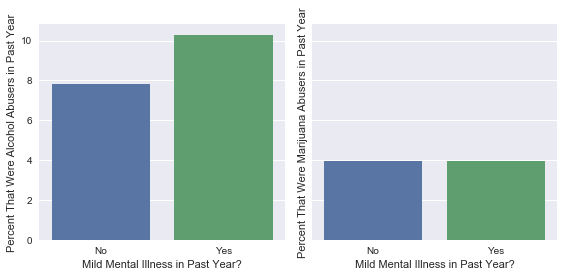

In [18]:
# create dataframes to subset the amount of people that have done each substance more than once that have had a mild MI
mildMI_df_alcohol = alcohol_done_more_than_once_year[alcohol_done_more_than_once_year['Mild Mental Illness in Past Year']=='Yes']
mildMI_df_marijuana = marijuana_done_more_than_once_year[marijuana_done_more_than_once_year['Mild Mental Illness in Past Year']=='Yes']

# create dataframes to represent the percentages of people that have abused the substance out of people with mild MI's in past year
alcohol_percent_df_mildMI = mildMI_df_alcohol['Alcohol Abuse in Past Year'].value_counts().reset_index()
alcohol_percent_df_mildMI['Alcohol Abuse in Past Year (%)']= alcohol_percent_df_mildMI['Alcohol Abuse in Past Year']/float(alcohol_percent_df_mildMI['Alcohol Abuse in Past Year'].sum()) * 100

marijuana_percent_df_mildMI = mildMI_df_marijuana['Marijuana Abuse in Past Year'].value_counts().reset_index()
marijuana_percent_df_mildMI['Marijuana Abuse in Past Year (%)']= marijuana_percent_df_mildMI['Marijuana Abuse in Past Year']/float(marijuana_percent_df_mildMI['Marijuana Abuse in Past Year'].sum()) * 100

# creating variables to represent the percentage of people OUT of the people with mild MI's in past year
# that have abused the substance 
percent_alcohol_abuse_mildMI = alcohol_percent_df_mildMI.loc[1,'Alcohol Abuse in Past Year (%)']
percent_marijuana_abuse_mildMI = marijuana_percent_df_mildMI.loc[1,'Marijuana Abuse in Past Year (%)']

# create the df to represent people who have done the substance once but have not had mild MI's
# in past year
no_mildMI_df_alcohol = alcohol_done_more_than_once_year[alcohol_done_more_than_once_year['Mild Mental Illness in Past Year']=='No']
no_mildMI_df_marijuana = marijuana_done_more_than_once_year[marijuana_done_more_than_once_year['Mild Mental Illness in Past Year']=='No']

# create dataframes to represent the percentages of people that have abused the substance out of people without mild MI's
alcohol_percent_df_no_mildMI = no_mildMI_df_alcohol['Alcohol Abuse in Past Year'].value_counts().reset_index()
alcohol_percent_df_no_mildMI['Alcohol Abuse in Past Year (%)']= alcohol_percent_df_no_mildMI['Alcohol Abuse in Past Year']/float(alcohol_percent_df_no_mildMI['Alcohol Abuse in Past Year'].sum()) * 100

marijuana_percent_df_no_mildMI = no_mildMI_df_marijuana['Marijuana Abuse in Past Year'].value_counts().reset_index()
marijuana_percent_df_no_mildMI['Marijuana Abuse in Past Year (%)']= marijuana_percent_df_no_mildMI['Marijuana Abuse in Past Year']/float(marijuana_percent_df_no_mildMI['Marijuana Abuse in Past Year'].sum()) * 100

# creating variables to represent the percentage of people OUT of the people with no SOMMI's in past year
# that have abused the substance 
percent_alcohol_abuse_no_mildMI = alcohol_percent_df_no_mildMI.loc[1,'Alcohol Abuse in Past Year (%)']
percent_marijuana_abuse_no_mildMI = marijuana_percent_df_no_mildMI.loc[1,'Marijuana Abuse in Past Year (%)']

# make the comparison DataFrames manually
alcohol_abuse_comparison_mildMI_df = pd.DataFrame([{'Mild Mental Illness in Past Year?':'No','Percent That Were Alcohol Abusers in Past Year':percent_alcohol_abuse_no_mildMI},
                                           {'Mild Mental Illness in Past Year?':'Yes','Percent That Were Alcohol Abusers in Past Year':percent_alcohol_abuse_mildMI}])
marijuana_abuse_comparison_mildMI_df = pd.DataFrame([{'Mild Mental Illness in Past Year?':'No','Percent That Were Marijuana Abusers in Past Year':percent_marijuana_abuse_no_mildMI},
                                           {'Mild Mental Illness in Past Year?':'Yes','Percent That Were Marijuana Abusers in Past Year':percent_marijuana_abuse_no_mildMI}])


fig, axes = plt.subplots(1,2,figsize=(8,4),sharey=True)
sns.barplot(data=alcohol_abuse_comparison_mildMI_df,x='Mild Mental Illness in Past Year?',y='Percent That Were Alcohol Abusers in Past Year',ci=None,ax=axes[0])
sns.barplot(data=marijuana_abuse_comparison_mildMI_df,x='Mild Mental Illness in Past Year?',y='Percent That Were Marijuana Abusers in Past Year',ci=None,ax=axes[1])
plt.tight_layout()
plt.show()

We can see that out of the people with mild mental illnesses in the past year, there were a higher percentage of alcohol abusers. The percentages were about the same with marijuana abusers.

# Comparing Alcohol and Marijuana Abuse between those with and without MDEs in past year

Let's see if we can find any correlation between major depressive episodes in the past year and whether or not the individual has used alcohol or marijuana before 18 years of age. We will use the same approach that we used with severe psychological distress.

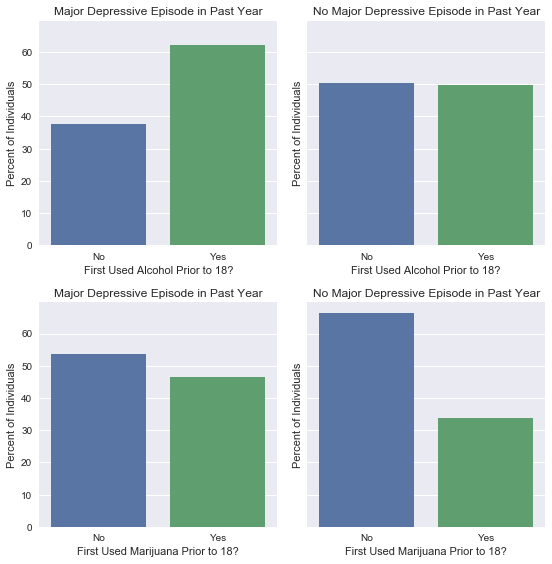

In [19]:
# getting the subsets of people that have had MDE's in the past year and not had MDE's
MDE_df = df[df['Major Depressive Episode in Past Year']=='Yes']
noMDE_df = df[df['Major Depressive Episode in Past Year']=='No']

# subplots to compare 
fig, axes = plt.subplots(2,2,figsize=(8,8),sharey=True)


# create a new dataframe with the percentages - those who used alcohol prior to 18 with MDE in past year

alcohol_prior_to18_percent_MDE = MDE_df['First Used Alcohol Prior to 18'].value_counts().reset_index()
alcohol_sum_MDE = float(alcohol_prior_to18_percent_MDE['First Used Alcohol Prior to 18'].sum())
alcohol_prior_to18_percent_MDE['First Used Alcohol Prior to 18'] = alcohol_prior_to18_percent_MDE['First Used Alcohol Prior to 18'].map(lambda a:(a/alcohol_sum_MDE) * 100)

# set styles and labels for 1st subplot

sns.set(style='darkgrid')
sns.barplot(data=alcohol_prior_to18_percent_MDE,x='index',
            y='First Used Alcohol Prior to 18',ax=axes[0,0],order=['No','Yes'])
axes[0,0].set_title('Major Depressive Episode in Past Year')
axes[0,0].set_xlabel('First Used Alcohol Prior to 18?')
axes[0,0].set_ylabel('Percent of Individuals')

# create new dataframe with percentages - those who used alcohol prior to 18 without MDE in past year

alcohol_prior_to18_percent_noMDE = noMDE_df['First Used Alcohol Prior to 18'].value_counts().reset_index()
alcohol_sum_noMDE = float(alcohol_prior_to18_percent_noMDE['First Used Alcohol Prior to 18'].sum())
alcohol_prior_to18_percent_noMDE['First Used Alcohol Prior to 18'] = alcohol_prior_to18_percent_noMDE['First Used Alcohol Prior to 18'].map(lambda a:(a/alcohol_sum_noMDE) * 100)

# set styles and labels for 2nd subplot

sns.set(style='darkgrid')
sns.barplot(data=alcohol_prior_to18_percent_noMDE,x='index',y='First Used Alcohol Prior to 18'
            ,ax=axes[0,1],order=['No','Yes'])
axes[0,1].set_title('No Major Depressive Episode in Past Year')
axes[0,1].set_xlabel('First Used Alcohol Prior to 18?')
axes[0,1].set_ylabel('Percent of Individuals')

# create new dataframe with percentages - those who used marijuana prior to 18 with MDE in past year

marijuana_prior_to18_percent_MDE = MDE_df['First Used Marijuana Prior to 18'].value_counts().reset_index()
marijuana_sum_MDE = float(marijuana_prior_to18_percent_MDE['First Used Marijuana Prior to 18'].sum())
marijuana_prior_to18_percent_MDE['First Used Marijuana Prior to 18'] = marijuana_prior_to18_percent_MDE['First Used Marijuana Prior to 18'].map(lambda a:(a/marijuana_sum_MDE) * 100)

# set styles and labels for 3rd subplot 

sns.set(style='darkgrid')
sns.barplot(data=marijuana_prior_to18_percent_MDE,x='index',y='First Used Marijuana Prior to 18'
            ,ax=axes[1,0],order=['No','Yes'])
axes[1,0].set_title('Major Depressive Episode in Past Year')
axes[1,0].set_xlabel('First Used Marijuana Prior to 18?')
axes[1,0].set_ylabel('Percent of Individuals')

# create new dataframe with percentages - those who used marijuana prior to 18 without MDE in past year

marijuana_prior_to18_percent_noMDE = noMDE_df['First Used Marijuana Prior to 18'].value_counts().reset_index()
marijuana_sum_noMDE = float(marijuana_prior_to18_percent_noMDE['First Used Marijuana Prior to 18'].sum())
marijuana_prior_to18_percent_noMDE['First Used Marijuana Prior to 18'] = marijuana_prior_to18_percent_noMDE['First Used Marijuana Prior to 18'].map(lambda a:(a/marijuana_sum_noMDE) * 100)

# set styles and labels for 4th subplot

sns.set(style='darkgrid')
sns.barplot(data=marijuana_prior_to18_percent_noMDE,x='index',y='First Used Marijuana Prior to 18',
           ax=axes[1,1],order=['No','Yes'])
axes[1,1].set_title('No Major Depressive Episode in Past Year')
axes[1,1].set_xlabel('First Used Marijuana Prior to 18?')
axes[1,1].set_ylabel('Percent of Individuals')
plt.tight_layout()
plt.show()

We got similar results to those with severe psychological distress. There are a higher percentage of people who have used the substance prior to 18 years old amongst those who have had a major depressive episode in the past year.

# Comparing Psychological Distress Scores between Individuals

There is a Psychological Distress Score that is calculated in the survey. Let's see if there are any patterns that we can identify regarding an individuals actual score and there usage of various substances.

# Comparing Psychological Distress Scores in the Past Month

First, let's compare psychological distress scores between those who have abused alcohol and those who have not:

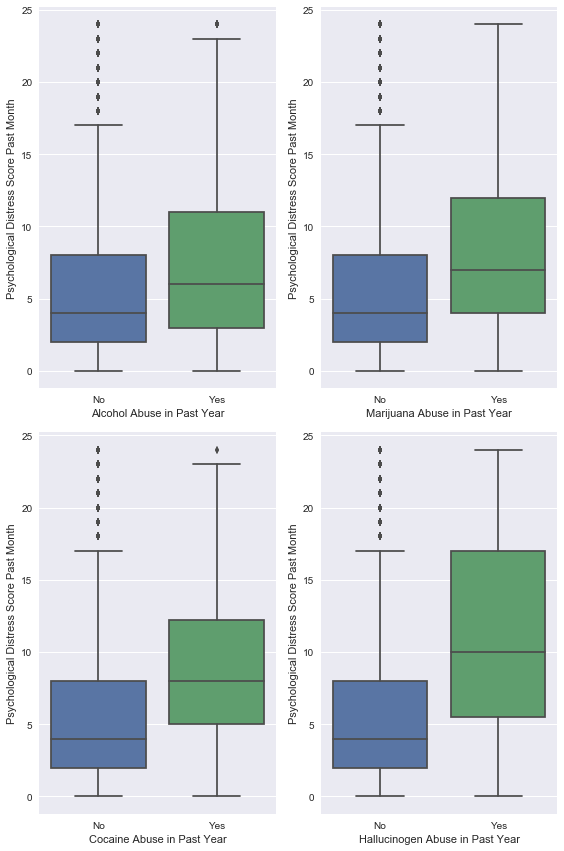

In [20]:
fig, axes = plt.subplots(2,2,figsize=(8,12))

# make boxplot for alcohol data
sns.boxplot(data=df,x='Alcohol Abuse in Past Year',y='Psychological Distress Score Past Month',ax=axes[0,0])

# make boxplot for marijuana data
sns.boxplot(data=df,x='Marijuana Abuse in Past Year',y='Psychological Distress Score Past Month',ax=axes[0,1])

# make boxplot for cocaine
sns.boxplot(data=df,x='Cocaine Abuse in Past Year',y='Psychological Distress Score Past Month',ax=axes[1,0])

# make boxplot for hallucinogen data
sns.boxplot(data=df,x='Hallucinogen Abuse in Past Year',y='Psychological Distress Score Past Month',ax=axes[1,1])

plt.tight_layout()
plt.show()

Here, we get some very interesting results. The psychological distress score seems to be significantly higher for those who have abused each substance in the past year. Let's make this comparison with substance dependence as well.

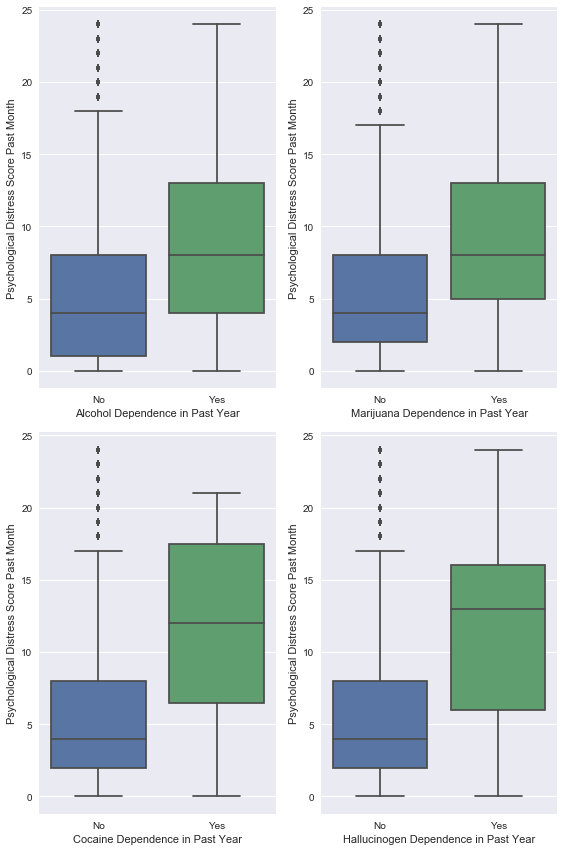

In [21]:
fig, axes = plt.subplots(2,2,figsize=(8,12))

# make boxplot for alcohol data
sns.boxplot(data=df,x='Alcohol Dependence in Past Year',y='Psychological Distress Score Past Month',ax=axes[0,0])

# make boxplot for marijuana data
sns.boxplot(data=df,x='Marijuana Dependence in Past Year',y='Psychological Distress Score Past Month',ax=axes[0,1])

# make boxplot for cocaine
sns.boxplot(data=df,x='Cocaine Dependence in Past Year',y='Psychological Distress Score Past Month',ax=axes[1,0])

# make boxplot for hallucinogen data
sns.boxplot(data=df,x='Hallucinogen Dependence in Past Year',y='Psychological Distress Score Past Month',ax=axes[1,1])

plt.tight_layout()
plt.show()

We get similar results with substance dependence in the past year.

Now, we will examine and compare the ranges for the number of days that the individual have used the substance in the past year.

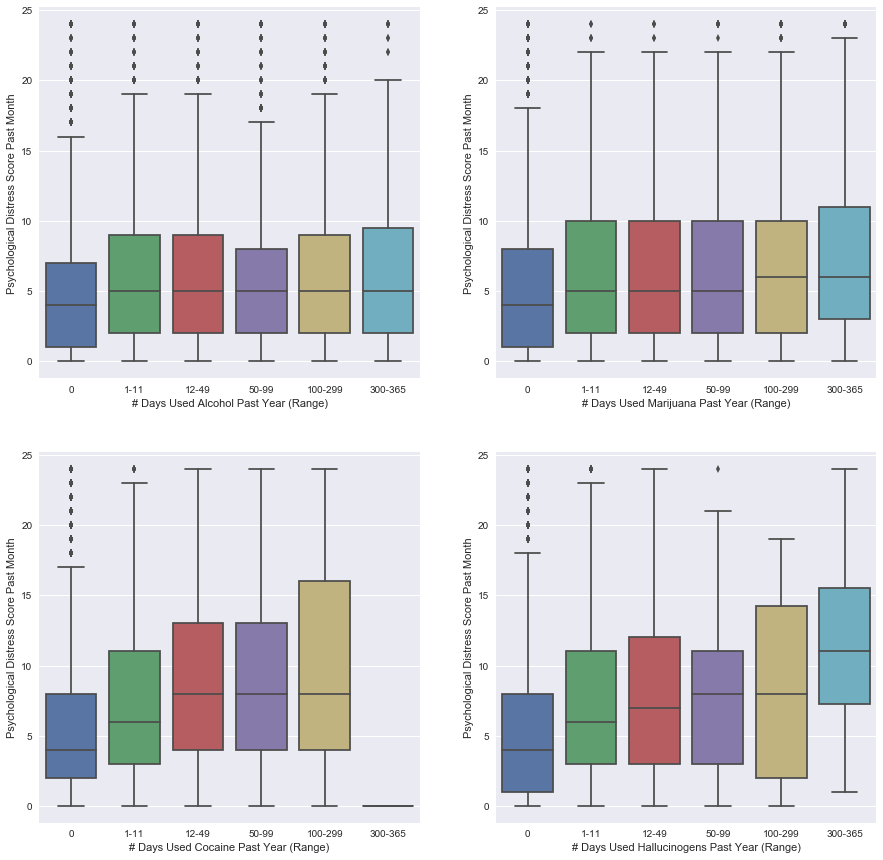

In [22]:
fig, axes = plt.subplots(2,2,figsize=(15,15))

# make boxplot for alcohol data
sns.boxplot(data=df,x='# Days Used Alcohol Past Year (Range)',y='Psychological Distress Score Past Month',ax=axes[0,0],
           order = ['0','1-11','12-49','50-99','100-299','300-365'])

# make boxplot for marijuana data
sns.boxplot(data=df,x='# Days Used Marijuana Past Year (Range)',y='Psychological Distress Score Past Month',ax=axes[0,1],
           order = ['0','1-11','12-49','50-99','100-299','300-365'])

# make boxplot for cocaine
sns.boxplot(data=df,x='# Days Used Cocaine Past Year (Range)',y='Psychological Distress Score Past Month',ax=axes[1,0],
           order = ['0','1-11','12-49','50-99','100-299','300-365'])

# make boxplot for hallucinogen data
sns.boxplot(data=df,x='# Days Used Hallucinogens Past Year (Range)',y='Psychological Distress Score Past Month',ax=axes[1,1],
           order = ['0','1-11','12-49','50-99','100-299','300-365'])


plt.show()

Let's do the same with the past month.

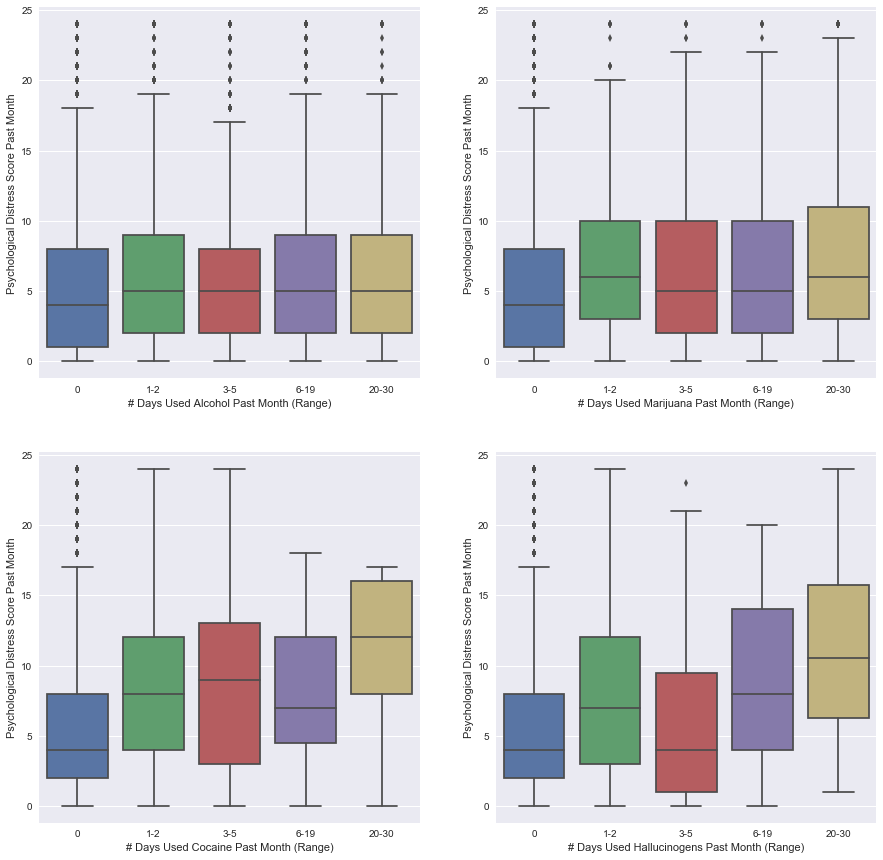

In [23]:
fig, axes = plt.subplots(2,2,figsize=(15,15))

#make boxplot for alcohol data
sns.boxplot(data=df,x='# Days Used Alcohol Past Month (Range)',y='Psychological Distress Score Past Month',ax=axes[0,0],
          order = ['0','1-2','3-5','6-19','20-30'])

#make boxplot for marijuana data
sns.boxplot(data=df,x='# Days Used Marijuana Past Month (Range)',y='Psychological Distress Score Past Month',ax=axes[0,1],
          order = ['0','1-2','3-5','6-19','20-30'])

#make boxplot for cocaine data
sns.boxplot(data=df,x='# Days Used Cocaine Past Month (Range)',y='Psychological Distress Score Past Month',ax=axes[1,0],
          order = ['0','1-2','3-5','6-19','20-30'])

#make boxplot for hallucinogen data
sns.boxplot(data=df,x='# Days Used Hallucinogens Past Month (Range)',y='Psychological Distress Score Past Month',ax=axes[1,1],
          order = ['0','1-2','3-5','6-19','20-30'])

plt.show()


There is a stronger pattern for # days used in the past year than # days used in the past month (which shows mixed results). In every case, however, the highest range of usage has a higher median psychological distress score than the lowest range of usage for indivuals.

Let's examine patterns between substance recency and psychological distress score in the past month

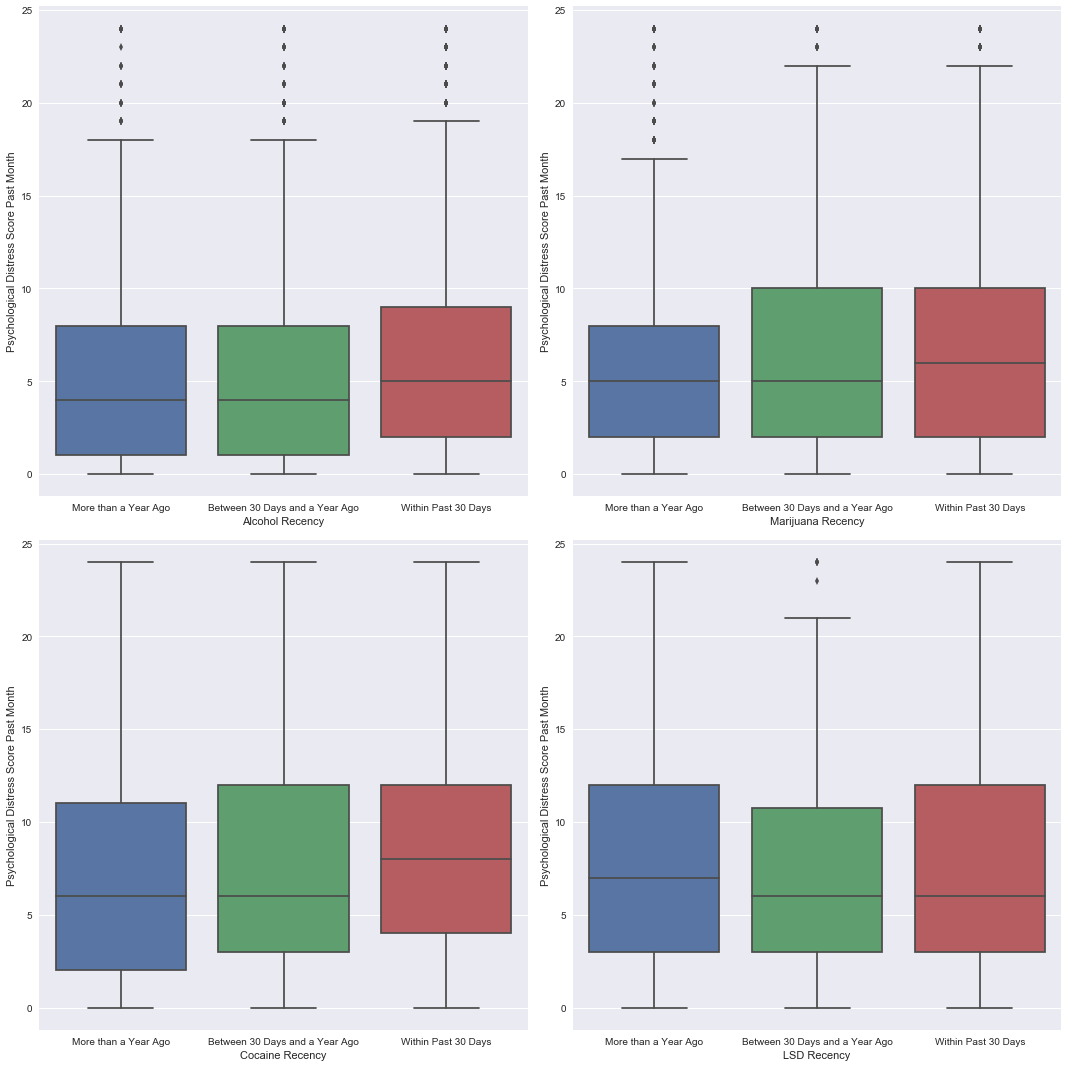

In [24]:
fig, axes = plt.subplots(2,2,figsize=(15,15))

#make boxplot for alcohol data
sns.boxplot(data=df,x='Alcohol Recency',y='Psychological Distress Score Past Month',ax=axes[0,0],
          order = ['More than a Year Ago','Between 30 Days and a Year Ago','Within Past 30 Days'])

#make boxplot for marijuana data
sns.boxplot(data=df,x='Marijuana Recency',y='Psychological Distress Score Past Month',ax=axes[0,1],
          order = ['More than a Year Ago','Between 30 Days and a Year Ago','Within Past 30 Days'])

#make boxplot for cocaine data
sns.boxplot(data=df,x='Cocaine Recency',y='Psychological Distress Score Past Month',ax=axes[1,0],
          order = ['More than a Year Ago','Between 30 Days and a Year Ago','Within Past 30 Days'])

#make boxplot for hallucinogen data
sns.boxplot(data=df,x='LSD Recency',y='Psychological Distress Score Past Month',ax=axes[1,1],
          order = ['More than a Year Ago','Between 30 Days and a Year Ago','Within Past 30 Days'])
plt.tight_layout()
plt.show()

As we can see, except for hallucinogens, individuals who have had the substance within the past 30 days have had a higher psychological distress score.

Let's compare the psychological distress scores within the past month between people who have and have not tried the substance prior to 18 years of age:

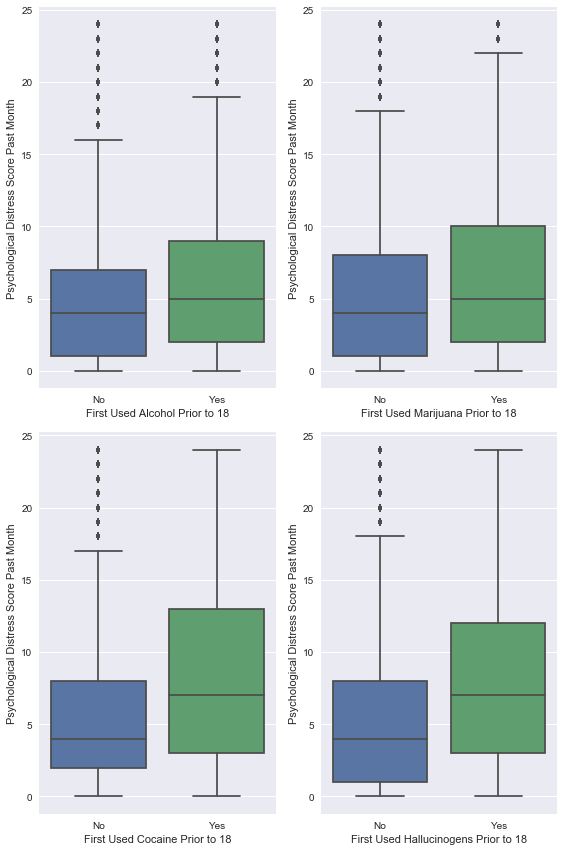

In [25]:
fig, axes = plt.subplots(2,2,figsize=(8,12))

# make boxplot for alcohol data
sns.boxplot(data=df,x='First Used Alcohol Prior to 18',y='Psychological Distress Score Past Month',ax=axes[0,0])

# make boxplot for marijuana data
sns.boxplot(data=df,x='First Used Marijuana Prior to 18',y='Psychological Distress Score Past Month',ax=axes[0,1])

# make boxplot for cocaine
sns.boxplot(data=df,x='First Used Cocaine Prior to 18',y='Psychological Distress Score Past Month',ax=axes[1,0])

# make boxplot for hallucinogen data
sns.boxplot(data=df,x='First Used Hallucinogens Prior to 18',y='Psychological Distress Score Past Month',ax=axes[1,1])

plt.tight_layout()
plt.show()

We can see that there is a higher psychological distress score for those who have used the substance prior to 18 years old.

# Comparing Psychological Distress Scores in the Worst Month of the Past Year

Here, we will do many of the same comparisons, except we will compare psychological distress scores in the worst month of the past year.

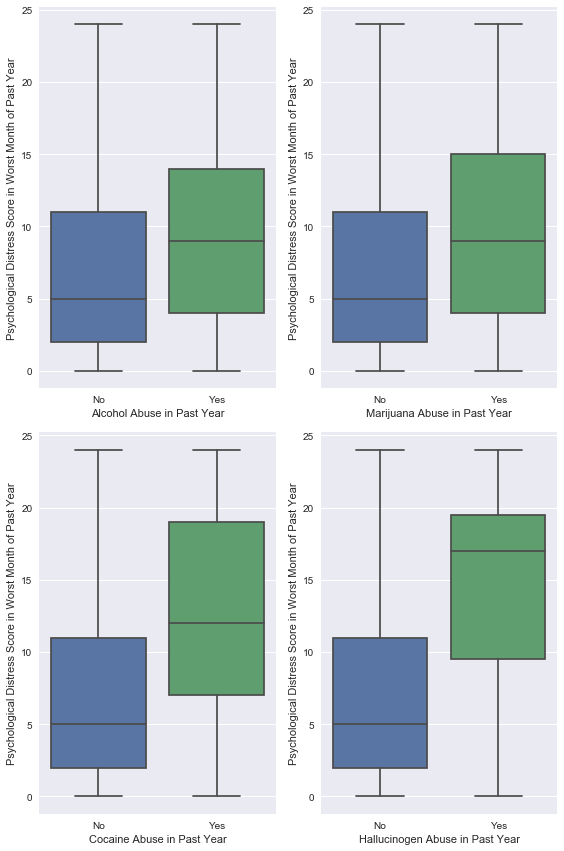

In [26]:
# comparing substance abusers
fig, axes = plt.subplots(2,2,figsize=(8,12))

# make boxplot for alcohol data
sns.boxplot(data=df,x='Alcohol Abuse in Past Year',y='Psychological Distress Score in Worst Month of Past Year',ax=axes[0,0])

# make boxplot for marijuana data
sns.boxplot(data=df,x='Marijuana Abuse in Past Year',y='Psychological Distress Score in Worst Month of Past Year',ax=axes[0,1])

# make boxplot for cocaine
sns.boxplot(data=df,x='Cocaine Abuse in Past Year',y='Psychological Distress Score in Worst Month of Past Year',ax=axes[1,0])

# make boxplot for hallucinogen data
sns.boxplot(data=df,x='Hallucinogen Abuse in Past Year',y='Psychological Distress Score in Worst Month of Past Year',ax=axes[1,1])

plt.tight_layout()
plt.show()

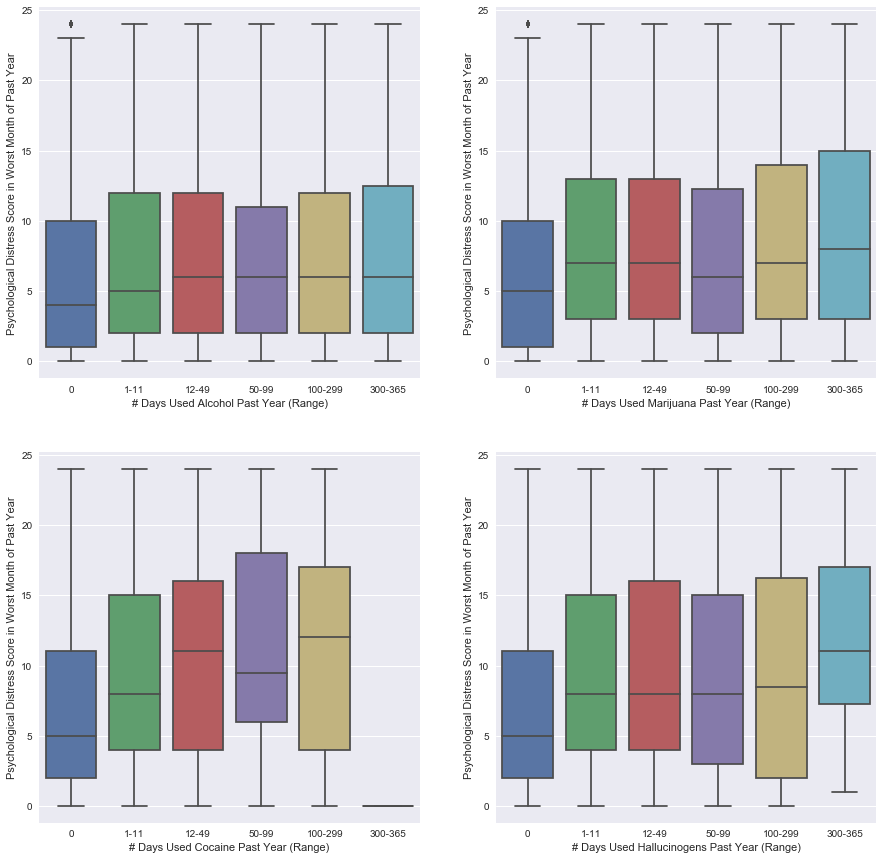

In [27]:
fig, axes = plt.subplots(2,2,figsize=(15,15))

# make boxplot for alcohol data
sns.boxplot(data=df,x='# Days Used Alcohol Past Year (Range)',y='Psychological Distress Score in Worst Month of Past Year',ax=axes[0,0],
           order = ['0','1-11','12-49','50-99','100-299','300-365'])

# make boxplot for marijuana data
sns.boxplot(data=df,x='# Days Used Marijuana Past Year (Range)',y='Psychological Distress Score in Worst Month of Past Year',ax=axes[0,1],
           order = ['0','1-11','12-49','50-99','100-299','300-365'])

# make boxplot for cocaine
sns.boxplot(data=df,x='# Days Used Cocaine Past Year (Range)',y='Psychological Distress Score in Worst Month of Past Year',ax=axes[1,0],
           order = ['0','1-11','12-49','50-99','100-299','300-365'])

# make boxplot for hallucinogen data
sns.boxplot(data=df,x='# Days Used Hallucinogens Past Year (Range)',y='Psychological Distress Score in Worst Month of Past Year',ax=axes[1,1],
           order = ['0','1-11','12-49','50-99','100-299','300-365'])


plt.show()

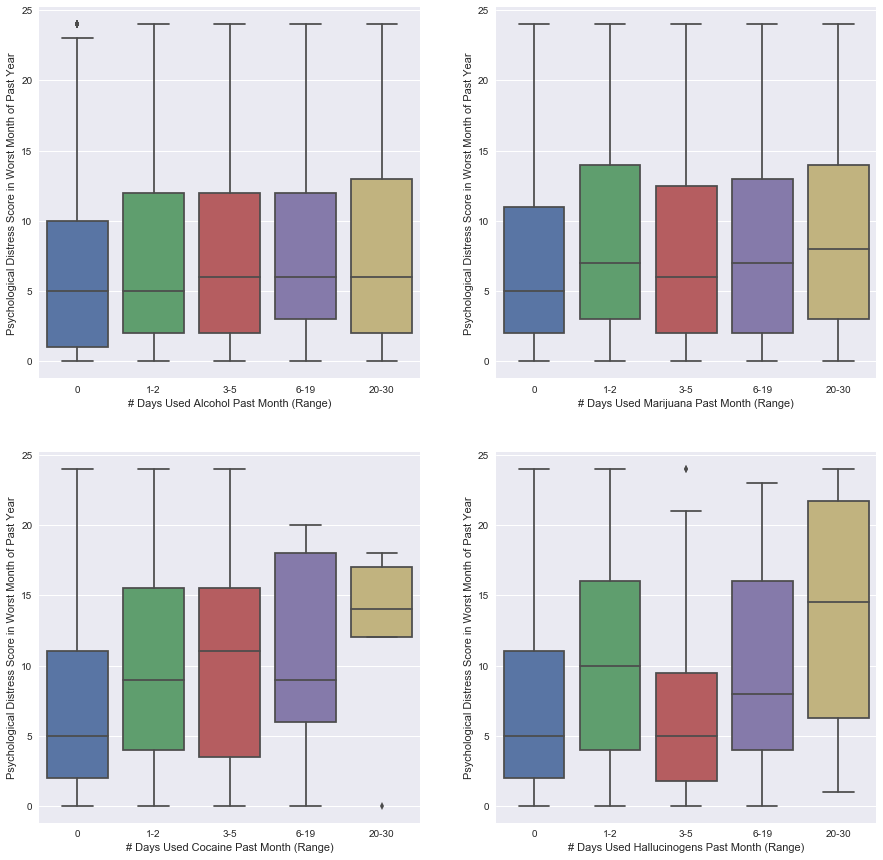

In [28]:
fig, axes = plt.subplots(2,2,figsize=(15,15))

#make boxplot for alcohol data
sns.boxplot(data=df,x='# Days Used Alcohol Past Month (Range)',y='Psychological Distress Score in Worst Month of Past Year',ax=axes[0,0],
          order = ['0','1-2','3-5','6-19','20-30'])

#make boxplot for marijuana data
sns.boxplot(data=df,x='# Days Used Marijuana Past Month (Range)',y='Psychological Distress Score in Worst Month of Past Year',ax=axes[0,1],
          order = ['0','1-2','3-5','6-19','20-30'])

#make boxplot for cocaine data
sns.boxplot(data=df,x='# Days Used Cocaine Past Month (Range)',y='Psychological Distress Score in Worst Month of Past Year',ax=axes[1,0],
          order = ['0','1-2','3-5','6-19','20-30'])

#make boxplot for hallucinogen data
sns.boxplot(data=df,x='# Days Used Hallucinogens Past Month (Range)',y='Psychological Distress Score in Worst Month of Past Year',ax=axes[1,1],
          order = ['0','1-2','3-5','6-19','20-30'])

plt.show()

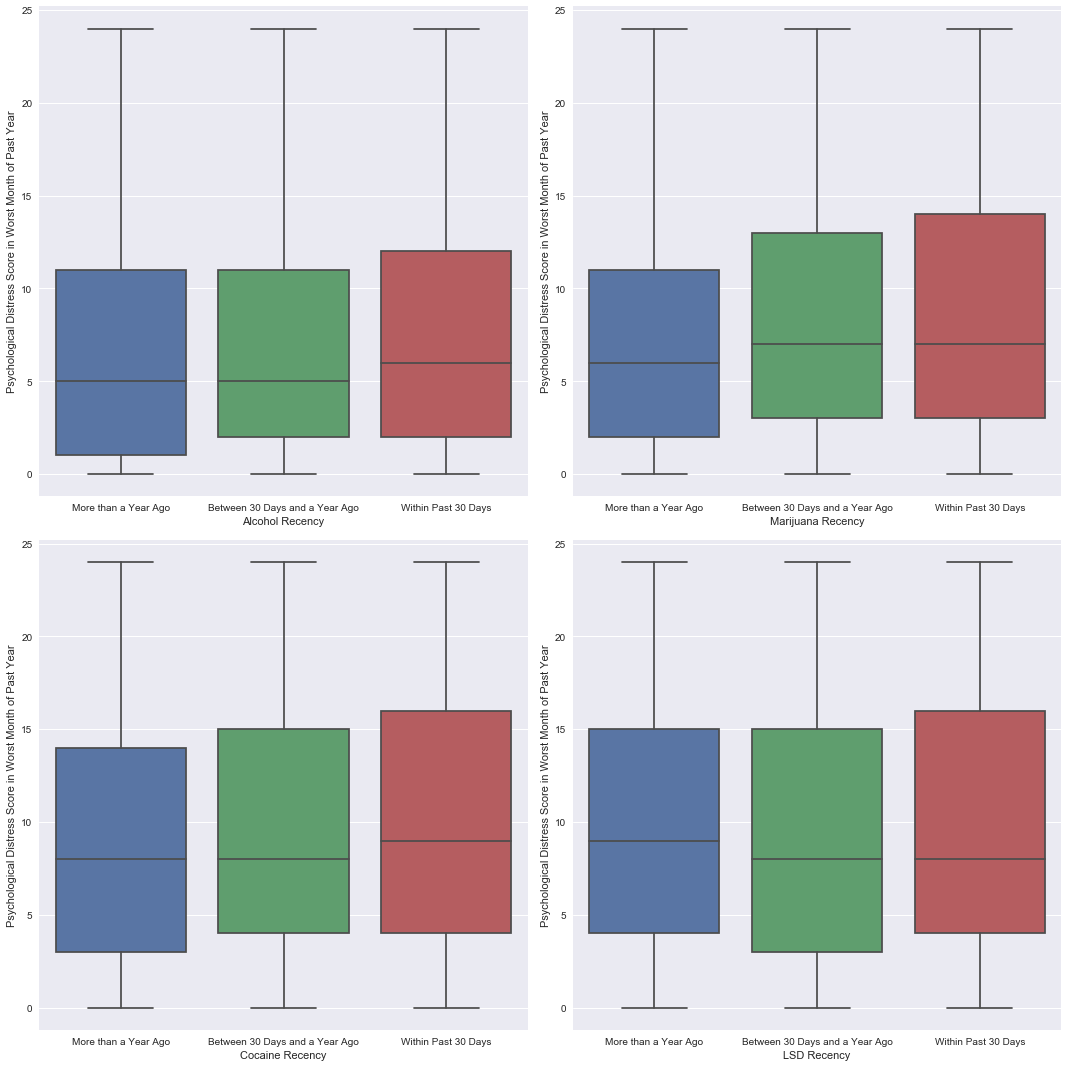

In [29]:
fig, axes = plt.subplots(2,2,figsize=(15,15))

#make boxplot for alcohol data
sns.boxplot(data=df,x='Alcohol Recency',y='Psychological Distress Score in Worst Month of Past Year',ax=axes[0,0],
          order = ['More than a Year Ago','Between 30 Days and a Year Ago','Within Past 30 Days'])

#make boxplot for marijuana data
sns.boxplot(data=df,x='Marijuana Recency',y='Psychological Distress Score in Worst Month of Past Year',ax=axes[0,1],
          order = ['More than a Year Ago','Between 30 Days and a Year Ago','Within Past 30 Days'])

#make boxplot for cocaine data
sns.boxplot(data=df,x='Cocaine Recency',y='Psychological Distress Score in Worst Month of Past Year',ax=axes[1,0],
          order = ['More than a Year Ago','Between 30 Days and a Year Ago','Within Past 30 Days'])

#make boxplot for hallucinogen data
sns.boxplot(data=df,x='LSD Recency',y='Psychological Distress Score in Worst Month of Past Year',ax=axes[1,1],
          order = ['More than a Year Ago','Between 30 Days and a Year Ago','Within Past 30 Days'])
plt.tight_layout()
plt.show()

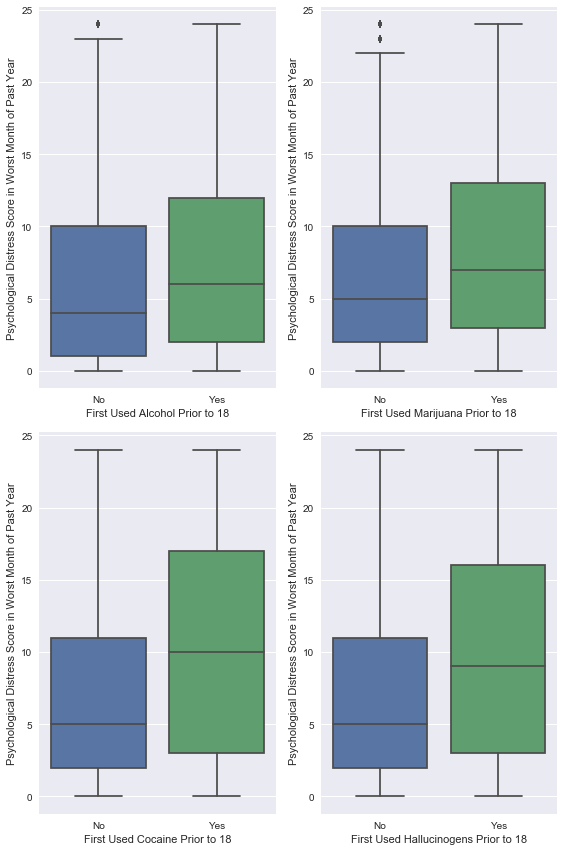

In [30]:
fig, axes = plt.subplots(2,2,figsize=(8,12))

# make boxplot for alcohol data
sns.boxplot(data=df,x='First Used Alcohol Prior to 18',y='Psychological Distress Score in Worst Month of Past Year',ax=axes[0,0])

# make boxplot for marijuana data
sns.boxplot(data=df,x='First Used Marijuana Prior to 18',y='Psychological Distress Score in Worst Month of Past Year',ax=axes[0,1])

# make boxplot for cocaine
sns.boxplot(data=df,x='First Used Cocaine Prior to 18',y='Psychological Distress Score in Worst Month of Past Year',ax=axes[1,0])

# make boxplot for hallucinogen data
sns.boxplot(data=df,x='First Used Hallucinogens Prior to 18',y='Psychological Distress Score in Worst Month of Past Year',ax=axes[1,1])

plt.tight_layout()
plt.show()

We can see that when dealing with the worst psychological distress score in the worst month of the past year, there are a lot of similar patterns as when we investigated the score in the past month.

# Regression plots

Now, let's see if we can make some regression plots relating psychological distress score to other numerical independent variables, such as # of days that individuals used the substance.

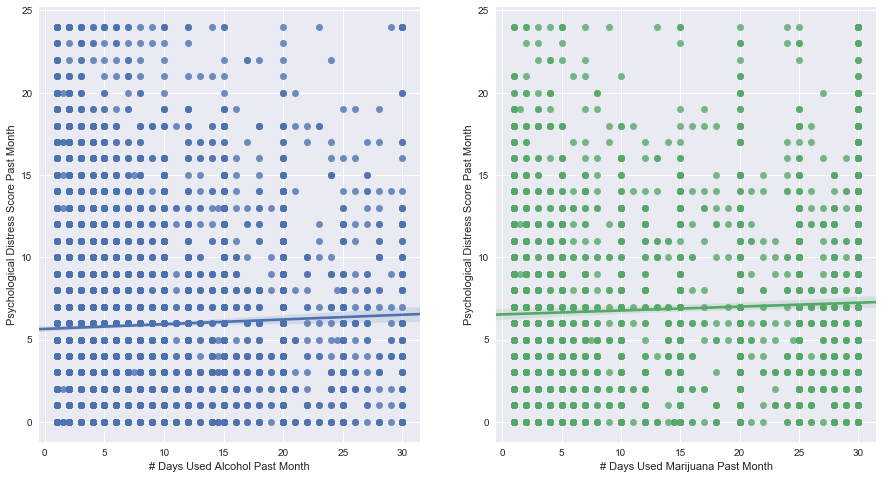

In [31]:
#seaborn regression plots
fig, axes = plt.subplots(1,2,figsize=(15,8))

# regression plots for alcohol data
sns.regplot(data=alcohol_done_more_than_once_month,x='# Days Used Alcohol Past Month',y='Psychological Distress Score Past Month',
           ax=axes[0])

# regressoin plots for marijuana data
sns.regplot(data=marijuana_done_more_than_once_month,x='# Days Used Marijuana Past Month',y='Psychological Distress Score Past Month',
           ax=axes[1])
plt.show()

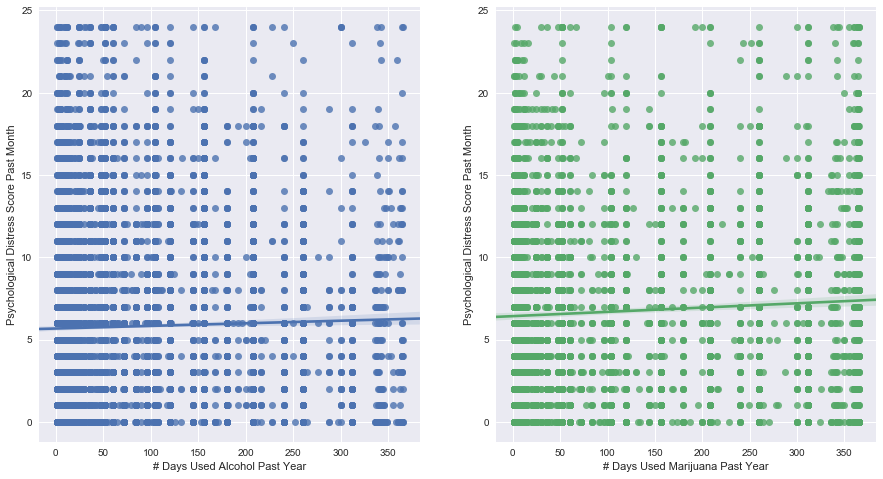

In [32]:
#seaborn regression plots
fig, axes = plt.subplots(1,2,figsize=(15,8))

# regression plots for alcohol data
sns.regplot(data=alcohol_done_more_than_once_year,x='# Days Used Alcohol Past Year',y='Psychological Distress Score Past Month',
           ax=axes[0])

# regressoin plots for marijuana data
sns.regplot(data=marijuana_done_more_than_once_year,x='# Days Used Marijuana Past Year',y='Psychological Distress Score Past Month',
           ax=axes[1])
plt.show()

As we can see, there is a very loose positive correlation for each of these plots. This mostly corroborates the findings we had that the number of days that the substance was used does not show a strong correlation with psychological distress. However, there is some correlation.

# Conclusions from initial exploration of trends and visualizations.

One of the biggest trends we found was whether or not the individual was an abuser of the substance. When comparing the subsets of people without and with severe psychological distress, there was a higher percentage of abusers of each substance. This trend stayed consistent when we evaluated whether or not the individual had a major depressive episode in the past year, and whether or not they had a mild mental illness in the past year. Using the substance prior to the age of 18 years old also seemed to have a significant impact on whether or not the individual had psychological distress. We got some very interesting findings when we looked at the actual psychological distress score of the individuals: in almost every investigation of substance use, it was clear that using the substance more resulted in a higher psychological distress score. By looking at boxplots of the substance abusers, we were able to see that abusers had significantly higher psychological distress scores. This correlation was even stronger when we examined the psychological distress score in the worst month of the past year. We may want to explore this pattern further, and examine why the regression plots we made don't have the strongest correlation. Is there a threshold where the an increase in the number of days don't show a strong correlation? Or do they only matter after a certain threshold? Why is there such a strong difference in psychological distress score for abusers, but there doesn't seem to be a huge correlation between days used and psychological distress?

# Applying Inferential Statistics

# Alcohol Abuse effect on Pscyhological Distress

Let's do a two-sample proportion z-test on the percent of alcohol abusers in two groups: those with severe psychological distress in the past month, and those without severe psychological distress in the past month. Keep in mind, the total subset is of the people who have used alcohol more than once in the past year.

These are random samples, and an individual's alcohol abuse is independent of someone else's. We can assume normality of the distribution when n * p >= 10, and n * (1-p) >= 10, where n is the number of observations in the sample and p is the proportion of alcohol abusers.

Let's write functions to perform the test of normality, perform the test, and construct a confidence interval.

In [33]:
import scipy.stats as st 
def two_sample_proportion_test(sample1_proportion,sample2_proportion,n1,n2):
    difference = sample1_proportion - sample2_proportion
    sample1_var = (sample1_proportion * (1-sample1_proportion))/n1
    sample2_var = (sample2_proportion * (1-sample2_proportion))/n2
    SE_total = np.sqrt(sample1_var + sample2_var)
    z_score = difference/SE_total
    if (z_score < 0):
        p_value = st.norm.cdf(z_score)
    else:
        p_value = 1-st.norm.cdf(z_score)
    print("The p-value is: " + `p_value`)
def two_sample_proportion_test_normality(sample1_proportion,sample2_proportion,n1,n2):
    print("Testing normality for 1st sample")
    print("n*p = " + `n1 * sample1_proportion`)
    print("n*(1-p) = " + `n1 * (1 - sample1_proportion)`)
          
    print("Testing normality for 2nd sample")
    print("n*p = " + `n2 * sample2_proportion`)
    print("n*(1-p) = " + `n2 * (1 - sample2_proportion)`)
def two_sample_proportion_CI(sample1_proportion,sample2_proportion,n1,n2,alpha):
    difference = sample1_proportion - sample2_proportion
    sample1_var = (sample1_proportion * (1-sample1_proportion))/n1
    sample2_var = (sample2_proportion * (1-sample2_proportion))/n2
    SE_total = np.sqrt(sample1_var + sample2_var)
    print st.norm.interval(alpha,loc=difference,scale=SE_total)

In [34]:
# testing normality for both distributions
proportion_alcohol_abuse_psychological_distress = percent_alcohol_abuse_psychological_distress/100.
proportion_alcohol_abuse_no_psychological_distress = percent_alcohol_abuse_no_psychological_distress/100.
two_sample_proportion_test_normality(proportion_alcohol_abuse_psychological_distress,proportion_alcohol_abuse_no_psychological_distress,
                                    len(psychological_distress_df_alcohol),len(no_psychological_distress_df_alcohol))

Testing normality for 1st sample
n*p = 152.0
n*(1-p) = 1085.0
Testing normality for 2nd sample
n*p = 739.0
n*(1-p) = 9018.0


We have tested normality, so we can use a two-sample z-test. Let's state our null and alternative hypotheses.

- Null hypothesis: There is no significant difference between the proportion of alcohol abusers between people with and without severe psychological distress in the past month.
- Alternate hypothesis: The proportion of alcohol abusers amongst people with severe psychological distress in the past month is significantly greater than that of people without severe psychological distress in the past month.


In [35]:
two_sample_proportion_test(proportion_alcohol_abuse_psychological_distress,proportion_alcohol_abuse_no_psychological_distress,
                                    len(psychological_distress_df_alcohol),len(no_psychological_distress_df_alcohol))

The p-value is: 6.049427357934789e-07


Thus, since our p-value is less than than 0.01, we would reject our null hypothesis at the alpha = 0.01 level. We can conclude that the proportion of alcohol abusers with severe psychological distress in the past month is significantly greater than that of people without severe psychological distress in the past month.

Now, let's construct a 99% confidence interval for the difference in the proportion of alcohol abusers between those with and without severe psychological distress in the past month.

In [36]:
two_sample_proportion_CI(proportion_alcohol_abuse_psychological_distress,proportion_alcohol_abuse_no_psychological_distress,
                                    len(psychological_distress_df_alcohol),len(no_psychological_distress_df_alcohol),0.99)

(0.022123490117309356, 0.072151382828002208)


We are 99% confident that the true difference in proportions lies within this interval.

Let's repeat this process for marijuana, cocaine, and hallucinogens.

# Marijuana Abuse on Psychological Distress

In [37]:
proportion_marijuana_abuse_psychological_distress = percent_marijuana_abuse_psychological_distress/100.
proportion_marijuana_abuse_no_psychological_distress = percent_marijuana_abuse_no_psychological_distress/100.

two_sample_proportion_test_normality(proportion_marijuana_abuse_psychological_distress,proportion_marijuana_abuse_no_psychological_distress,
                                    len(psychological_distress_df_marijuana),len(no_psychological_distress_df_marijuana))

Testing normality for 1st sample
n*p = 44.0
n*(1-p) = 679.0
Testing normality for 2nd sample
n*p = 143.0
n*(1-p) = 3731.0


We have tested normality, so we can use a two-sample z-test. Let's state our null and alternative hypotheses.

- Null hypothesis: There is no significant difference between the proportion of marijuana abusers between people with and without severe psychological distress in the past month.
- Alternate hypothesis: The proportion of marijuana abusers amongst people with severe psychological distress in the past month is significantly greater than that of people without severe psychological distress in the past month.

In [38]:
two_sample_proportion_test(proportion_marijuana_abuse_psychological_distress,proportion_marijuana_abuse_no_psychological_distress,
                                    len(psychological_distress_df_marijuana),len(no_psychological_distress_df_marijuana))

The p-value is: 0.0053980904824544318


Thus, since our p-value is less than than 0.01, we would reject our null hypothesis at the alpha = 0.01 level. We can conclude that the proportion of marijuana abusers with severe psychological distress in the past month is significantly greater than that of people without severe psychological distress in the past month.

Now, let's construct a 99% confidence interval for the difference in the proportion of marijuana abusers between those with and without severe psychological distress in the past month.

In [39]:
two_sample_proportion_CI(proportion_marijuana_abuse_psychological_distress,proportion_marijuana_abuse_no_psychological_distress,
                                    len(psychological_distress_df_marijuana),len(no_psychological_distress_df_marijuana),0.99)

(-0.00024986848191363084, 0.048139441198131475)


We are 99% confident that the true difference in proportions lies within this interval.

# Cocaine Abuse on Psychological Distress

In [40]:
proportion_cocaine_abuse_psychological_distress = percent_cocaine_abuse_psychological_distress/100.
proportion_cocaine_abuse_no_psychological_distress = percent_cocaine_abuse_no_psychological_distress/100.

two_sample_proportion_test_normality(proportion_cocaine_abuse_psychological_distress,proportion_cocaine_abuse_no_psychological_distress,
                                    len(psychological_distress_df_cocaine),len(no_psychological_distress_df_cocaine))

Testing normality for 1st sample
n*p = 8.0
n*(1-p) = 142.0
Testing normality for 2nd sample
n*p = 30.0
n*(1-p) = 534.0


We have tested normality, so we can use a two-sample z-test. Let's state our null and alternative hypotheses.

- Null hypothesis: There is no significant difference between the proportion of cocaine abusers between people with and without severe psychological distress in the past month.
- Alternate hypothesis: The proportion of cocaine abusers amongst people with severe psychological distress in the past month is significantly greater than that of people without severe psychological distress in the past month.

In [41]:
two_sample_proportion_test(proportion_cocaine_abuse_psychological_distress,proportion_cocaine_abuse_no_psychological_distress,
                                    len(psychological_distress_df_cocaine),len(no_psychological_distress_df_cocaine))

The p-value is: 0.49725798239418206


Thus, since our p-value is greater than than 0.01, we would fail to reject our null hypothesis at the alpha = 0.01 level. We can conclude that the proportion of cocaine abusers with severe psychological distress in the past month is not significantly greater than that of people without severe psychological distress in the past month.

Now, let's construct a 99% confidence interval for the difference in the proportion of cocaine abusers between those with and without severe psychological distress in the past month.

In [42]:
two_sample_proportion_CI(proportion_cocaine_abuse_psychological_distress,proportion_cocaine_abuse_no_psychological_distress,
                                    len(psychological_distress_df_cocaine),len(no_psychological_distress_df_cocaine),0.99)

(-0.053015634255857091, 0.053299322199119509)


We are 99% confident that the true difference in proportions lies within this interval.

# Hallucinogen Abuse on Psychological Distress

In [43]:
proportion_halluc_abuse_psychological_distress = percent_halluc_abuse_psychological_distress/100.
proportion_halluc_abuse_no_psychological_distress = percent_halluc_abuse_no_psychological_distress/100.

two_sample_proportion_test_normality(proportion_halluc_abuse_psychological_distress,proportion_halluc_abuse_no_psychological_distress,
                                    len(psychological_distress_df_halluc),len(no_psychological_distress_df_halluc))

Testing normality for 1st sample
n*p = 13.0
n*(1-p) = 176.0
Testing normality for 2nd sample
n*p = 22.0
n*(1-p) = 781.0


We have tested normality, so we can use a two-sample z-test. Let's state our null and alternative hypotheses.

- Null hypothesis: There is no significant difference between the proportion of hallucinogen abusers between people with and without severe psychological distress in the past month.
- Alternate hypothesis: The proportion of hallucinogen abusers amongst people with severe psychological distress in the past month is significantly greater than that of people without severe psychological distress in the past month.

In [44]:
two_sample_proportion_test(proportion_halluc_abuse_psychological_distress,proportion_halluc_abuse_no_psychological_distress,
                                    len(psychological_distress_df_halluc),len(no_psychological_distress_df_halluc))

The p-value is: 0.015955865900982524


We would fail to reject the null hypothesis at the alpha=0.01 level, but we would reject it at the alpha=0.05 level. Thus, at the alpha = 0.05 level, the difference between the proportion of hallucinogen abusers amongst those with severe psychological distress in the past month and those without it is statistically significant.

Now, let's construct a 99% confidence interval for the difference in the proportion of hallucinogen abusers between those with and without severe psychological distress in the past month.

In [45]:
two_sample_proportion_CI(proportion_halluc_abuse_psychological_distress,proportion_halluc_abuse_no_psychological_distress,
                                    len(psychological_distress_df_halluc),len(no_psychological_distress_df_halluc),0.99)

(-0.0083005382134147751, 0.091072155231607138)


We are 99% confident that the true difference in proportions lies within this interval.

# Alcohol Abuse on Major Depressive Episode

Let's investigate the respective proportions of alcohol abusers amongst those with a major depressive episode in the past year and those without a major depressive episode in the past year. We will take the same approach that we did with severe psychological distress. First, to perform our two-sample z-test, we must test the two distributions for normality.

In [46]:
proportion_alcohol_abuse_major_depressive = percent_alcohol_abuse_major_depressive/100.
proportion_alcohol_abuse_no_major_depressive = percent_alcohol_abuse_no_major_depressive/100.

two_sample_proportion_test_normality(proportion_alcohol_abuse_major_depressive,proportion_alcohol_abuse_no_major_depressive,
                                    len(major_depressive_df_alcohol),len(no_major_depressive_df_alcohol))

Testing normality for 1st sample
n*p = 150.0
n*(1-p) = 1086.0
Testing normality for 2nd sample
n*p = 741.0
n*(1-p) = 9017.0


We have tested normality, so we can use a two-sample z-test. Let's state our null and alternative hypotheses.

- Null hypothesis: There is no significant difference between the proportion of alcohol abusers between people with and without a major depressive episode in the past year.
- Alternate hypothesis: The proportion of alcohol abusers amongst people with a major depressive episode in the past year is significantly greater than that of people without a major depressive episode in the past year.

In [47]:
two_sample_proportion_test(proportion_alcohol_abuse_major_depressive,proportion_alcohol_abuse_no_major_depressive,
                                    len(major_depressive_df_alcohol),len(no_major_depressive_df_alcohol))

The p-value is: 1.311486835353648e-06


Thus, since our p-value is less than than 0.01, we would reject our null hypothesis at the alpha = 0.01 level. We can conclude that the proportion of alcohol abusers with major depressive episodes in the past year is significantly greater than that of people without major depressive episodes in the past year.

Now, let's construct a 99% confidence interval for the difference in the proportion of alcohol abusers between those with and without major depressive episodes in the past year.

In [48]:
two_sample_proportion_CI(proportion_alcohol_abuse_major_depressive,proportion_alcohol_abuse_no_major_depressive,
                                    len(major_depressive_df_alcohol),len(no_major_depressive_df_alcohol),0.99)

(0.020519467939826185, 0.070323594362054084)


We are 99% confident that the true difference in proportions lies within this interval.

# Marijuana Abuse on Major Depressive Episode

Testing for normality:

In [49]:
proportion_marijuana_abuse_major_depressive = percent_marijuana_abuse_major_depressive/100.
proportion_marijuana_abuse_no_major_depressive = percent_marijuana_abuse_no_major_depressive/100.

two_sample_proportion_test_normality(proportion_marijuana_abuse_major_depressive,proportion_marijuana_abuse_no_major_depressive,
                                    len(major_depressive_df_marijuana),len(no_major_depressive_df_marijuana))

Testing normality for 1st sample
n*p = 30.0
n*(1-p) = 641.0
Testing normality for 2nd sample
n*p = 157.0
n*(1-p) = 3769.0


We have tested normality, so we can use a two-sample z-test. Let's state our null and alternative hypotheses.

- Null hypothesis: There is no significant difference between the proportion of marijuana abusers between people with and without a major depressive episode in the past year.
- Alternate hypothesis: The proportion of marijuana abusers amongst people with a major depressive episode in the past year is significantly greater than that of people without a major depressive episode in the past year.

In [50]:
two_sample_proportion_test(proportion_marijuana_abuse_major_depressive,proportion_marijuana_abuse_no_major_depressive,
                                    len(major_depressive_df_marijuana),len(no_major_depressive_df_marijuana))

The p-value is: 0.29089803882918874


Thus, since our p-value is greater than than 0.01, we would fail to reject our null hypothesis at the alpha = 0.01 level, and even at the 0.05 level. We can conclude that the proportion of alcohol abusers with major depressive episodes in the past year is not signficantly greater than that of people without major depressive episodes in the past year.

Now, let's construct a 99% confidence interval for the difference in the proportion of marijuana abusers between those with and without major depressive episodes in the past year.

In [51]:
two_sample_proportion_CI(proportion_marijuana_abuse_major_depressive,proportion_marijuana_abuse_no_major_depressive,
                                    len(major_depressive_df_marijuana),len(no_major_depressive_df_marijuana),0.99)

(-0.017353117246866473, 0.026792272164253936)


We are 99% confident that the true difference in proportions lies within this interval.

# Substance Use before 18 - Effect on Psychological Distress

Now, let's investigate the subsets of people with severe psychological distress in the past month again. We will do some hypothesis testing involving the percentage of them that have used substances prior to 18. Our approach will be almost identical to our approach that we used with substance abuse and severe psychological distress. 

# Alcohol

Once again, these are random samples and the observations are independent of each other, so we just need to check normality in both distributions.

In [52]:
alcohol_prior_to18_proportion_PD = alcohol_prior_to18_percent_PD.loc[0,'First Used Alcohol Prior to 18']/100
alcohol_prior_to18_proportion_noPD = alcohol_prior_to18_percent_noPD.loc[0,'First Used Alcohol Prior to 18']/100.

two_sample_proportion_test_normality(alcohol_prior_to18_proportion_PD,alcohol_prior_to18_proportion_noPD,
                                    len(psychological_distress_df),len(no_psychological_distress_df))

Testing normality for 1st sample
n*p = 975.0
n*(1-p) = 571.0
Testing normality for 2nd sample
n*p = 6552.0
n*(1-p) = 6455.0


We have tested normality, so we can use a two-sample z-test. Let's state our null and alternative hypotheses.

- Null hypothesis: There is no significant difference between the proportion of individuals who have used alcohol prior to 18 between the subsets of people who have and have not had severe psychological distress in the past month.
- Alternate hypothesis: The proportion of individuals who have used alcohol prior to 18 is greater amongst people who have had severe psychological distress in the past month.

In [53]:
two_sample_proportion_test(alcohol_prior_to18_proportion_PD,alcohol_prior_to18_proportion_noPD,
                                    len(psychological_distress_df),len(no_psychological_distress_df))

The p-value is: 0.0


Thus, since our p-value is less than than 0.01, we would reject our null hypothesis at the alpha = 0.01 level. We can conclude that the proportion of those who have used alcohol prior to 18 amongst those who have had severe psychological distress in the past year is significantly greater than that of people that have not had psychological distress in the past month.

Now, let's construct a 99% confidence interval for the difference in the proportion of those who first tried alcohol before 18 amongst the subsets of people with and without severe psychological distress in the past year.

In [54]:
two_sample_proportion_CI(alcohol_prior_to18_proportion_PD,alcohol_prior_to18_proportion_noPD,
                                    len(psychological_distress_df),len(no_psychological_distress_df),0.99)

(0.093357730260631155, 0.16050428114908738)


We are 99% confident that the true difference in proportions lies within this interval.

Let's repeat the same process for marijuana, cocaine, and hallucinogens.

# Marijuana

In [55]:
marijuana_prior_to18_proportion_PD = marijuana_prior_to18_percent_PD.loc[1,'First Used Marijuana Prior to 18']/100.
marijuana_prior_to18_proportion_noPD = marijuana_prior_to18_percent_noPD.loc[1,'First Used Marijuana Prior to 18']/100.

two_sample_proportion_test_normality(marijuana_prior_to18_proportion_PD,marijuana_prior_to18_proportion_noPD,
                                    len(psychological_distress_df),len(no_psychological_distress_df))

Testing normality for 1st sample
n*p = 764.0
n*(1-p) = 782.00000000000011
Testing normality for 2nd sample
n*p = 4320.0
n*(1-p) = 8687.0


- Null hypothesis: There is no significant difference between the proportion of individuals who have used marijuana prior to 18 between the subsets of people who have and have not had severe psychological distress in the past month.
- Alternate hypothesis: The proportion of individuals who have used marijuana prior to 18 is greater amongst people who have had severe psychological distress in the past month.

In [56]:
two_sample_proportion_test(marijuana_prior_to18_proportion_PD,marijuana_prior_to18_proportion_noPD,
                                    len(psychological_distress_df),len(no_psychological_distress_df))

The p-value is: 0.0


Thus, since our p-value is less than than 0.01, we would reject our null hypothesis at the alpha = 0.01 level. We can conclude that the proportion of those who have used marijuana prior to 18 amongst those who have had severe psychological distress in the past year is significantly greater than that of people that have not had psychological distress in the past month.

Now, let's construct a 99% confidence interval for the difference in the proportion of those who first tried marijuana before 18 amongst the subsets of people with and without severe psychological distress in the past month.

In [57]:
two_sample_proportion_CI(marijuana_prior_to18_proportion_PD,marijuana_prior_to18_proportion_noPD,
                                    len(psychological_distress_df),len(no_psychological_distress_df),0.99)

(0.12761250505256524, 0.19648683801188674)


We are 99% confident that the true difference in proportions lies within this interval.

# Cocaine

In [58]:
cocaine_prior_to18_proportion_PD = cocaine_prior_to18_percent_PD.loc[1,'First Used Cocaine Prior to 18']/100
cocaine_prior_to18_proportion_noPD = cocaine_prior_to18_percent_noPD.loc[1,'First Used Cocaine Prior to 18']/100.

two_sample_proportion_test_normality(cocaine_prior_to18_proportion_PD,cocaine_prior_to18_proportion_noPD,
                                    len(psychological_distress_df),len(no_psychological_distress_df))

Testing normality for 1st sample
n*p = 137.00000000000003
n*(1-p) = 1409.0
Testing normality for 2nd sample
n*p = 402.0
n*(1-p) = 12605.0


- Null hypothesis: There is no significant difference between the proportion of individuals who have used cocaine prior to 18 between the subsets of people who have and have not had severe psychological distress in the past month.
- Alternate hypothesis: The proportion of individuals who have used cocaine prior to 18 is greater amongst people who have had severe psychological distress in the past month.

In [59]:
two_sample_proportion_test(cocaine_prior_to18_proportion_PD,cocaine_prior_to18_proportion_noPD,
                                    len(psychological_distress_df),len(no_psychological_distress_df))

The p-value is: 2.7755575615628914e-15


Thus, since our p-value is less than than 0.01, we would reject our null hypothesis at the alpha = 0.01 level. We can conclude that the proportion of those who have used cocaine prior to 18 amongst those who have had severe psychological distress in the past year is significantly greater than that of people that have not had psychological distress in the past month.

Now, let's construct a 99% confidence interval for the difference in the proportion of those who first tried cocaine before 18 amongst the subsets of people with and without severe psychological distress in the past month.

In [60]:
two_sample_proportion_CI(cocaine_prior_to18_proportion_PD,cocaine_prior_to18_proportion_noPD,
                                    len(psychological_distress_df),len(no_psychological_distress_df),0.99)

(0.038686069353159283, 0.076732625983643679)


We are 99% confident that the true difference in proportions lies within this interval.

# Hallucinogens

In [61]:
halluc_prior_to18_proportion_PD = halluc_prior_to18_percent_PD.loc[1,'First Used Hallucinogens Prior to 18']/100
halluc_prior_to18_proportion_noPD = halluc_prior_to18_percent_noPD.loc[1,'First Used Hallucinogens Prior to 18']/100.

two_sample_proportion_test_normality(halluc_prior_to18_proportion_PD,halluc_prior_to18_proportion_noPD,
                                    len(psychological_distress_df),len(no_psychological_distress_df))

Testing normality for 1st sample
n*p = 236.99999999999997
n*(1-p) = 1309.0
Testing normality for 2nd sample
n*p = 858.99999999999989
n*(1-p) = 12148.0


- Null hypothesis: There is no significant difference between the proportion of individuals who have used hallucinogens prior to 18 between the subsets of people who have and have not had severe psychological distress in the past month.
- Alternate hypothesis: The proportion of individuals who have used hallucinogens prior to 18 is greater amongst people who have had severe psychological distress in the past month.

In [62]:
two_sample_proportion_test(halluc_prior_to18_proportion_PD,halluc_prior_to18_proportion_noPD,
                                    len(psychological_distress_df),len(no_psychological_distress_df))

The p-value is: 0.0


Now, let's construct a 99% confidence interval for the difference in the proportion of those who first tried hallucinogens before 18 amongst the subsets of people with and without severe psychological distress in the past month.

In [63]:
two_sample_proportion_CI(halluc_prior_to18_proportion_PD,halluc_prior_to18_proportion_noPD,
                                    len(psychological_distress_df),len(no_psychological_distress_df),0.99)

(0.062998198752813303, 0.11151674797057008)


We are 99% confident that the true difference in proportions lies within this interval.

# Comparing Psychological Distress Scores - Substance Abuse

Now, we will do some two sample hypothesis testing to compare psychological distress scores between those who have abused substances.

Let's write some functions similar to those which we wrote earlier for two-sample proportion tests. 

In [64]:
def two_sample_mean_test(sample1,sample2):
    difference = np.mean(sample1) - np.mean(sample2)
    sample1_var = np.var(sample1)/len(sample1)
    sample2_var = np.var(sample2)/len(sample2)
    SE_total = np.sqrt(sample1_var + sample2_var)
    z_score = difference/SE_total
    if (z_score<0):
        p_value = st.norm.cdf(z_score)
    else:
        p_value = 1 - st.norm.cdf(z_score)
    print("The p-value is " + `p_value`)
def two_sample_mean_CI(sample1,sample2,alpha):
    difference = np.mean(sample1) - np.mean(sample2)
    sample1_var = np.var(sample1)/len(sample1)
    sample2_var = np.var(sample2)/len(sample2)
    SE_total = np.sqrt(sample1_var + sample2_var)
    print st.norm.interval(alpha,loc=difference,scale=SE_total)

Since all samples we are dealing with have a sample size greater than 30, we will assume the CLT applies to each distribution.

# Alcohol

- Null hypothesis: There is no significant difference between the mean psychological distress score in the past month between people who have and have not abused alcohol in the past year
- Alternate hypothesis: The mean psychological distress score in the past month for those who have abused alcohol in the past year is significantly greater than that of those who have not abused alcohol in the past year.

In [65]:
alcohol_abuse_PD_score = df[df['Alcohol Abuse in Past Year']=='Yes']['Psychological Distress Score Past Month']
no_alcohol_abuse_PD_score = df[df['Alcohol Abuse in Past Year']=='No']['Psychological Distress Score Past Month']
two_sample_mean_test(alcohol_abuse_PD_score,no_alcohol_abuse_PD_score)

The p-value is 0.0


Since the p-value is less than 0.01, at the alpha=0.01 level, we reject the null hypothesis and conclude that the mean psychological distress score in the past month for those who have abused alcohol in the past year is significantly greater than that of those who have not abused alcohol in the past year.

Let's construct a 99% confidence interval for the difference between the mean psychological distress scores between those who have abused alcohol and those who have not.

In [66]:
two_sample_mean_CI(alcohol_abuse_PD_score,no_alcohol_abuse_PD_score,0.99)

(1.3178323031480796, 2.2875939399593226)


# Marijuana

- Null hypothesis: There is no significant difference between the mean psychological distress score in the past month between people who have and have not abused marijuana in the past year
- Alternate hypothesis: The mean psychological distress score in the past month for those who have abused marijuana in the past year is significantly greater than that of those who have not abused marijuana in the past year.

In [67]:
marijuana_abuse_PD_score = df[df['Marijuana Abuse in Past Year']=='Yes']['Psychological Distress Score Past Month']
no_marijuana_abuse_PD_score = df[df['Marijuana Abuse in Past Year']=='No']['Psychological Distress Score Past Month']
two_sample_mean_test(marijuana_abuse_PD_score,no_marijuana_abuse_PD_score)

The p-value is 5.228096844334118e-10


Since the p-value is less than 0.01, at the alpha=0.01 level, we reject the null hypothesis and conclude that the mean psychological distress score in the past month for those who have abused marijuana in the past year is significantly greater than that of those who have not abused marijuana in the past year.

Let's construct a 99% confidence interval for the difference between the mean psychological distress scores between those who have abused marijuana and those who have not.

In [68]:
two_sample_mean_CI(marijuana_abuse_PD_score,no_marijuana_abuse_PD_score,0.99)

(1.5496592504069799, 3.8134939462747264)


# Cocaine

- Null hypothesis: There is no significant difference between the mean psychological distress score in the past month between people who have and have not abused cocaine in the past year
- Alternate hypothesis: The mean psychological distress score in the past month for those who have abused cocaine in the past year is significantly greater than that of those who have not abused cocaine in the past year.

In [69]:
cocaine_abuse_PD_score = df[df['Cocaine Abuse in Past Year']=='Yes']['Psychological Distress Score Past Month']
no_cocaine_abuse_PD_score = df[df['Cocaine Abuse in Past Year']=='No']['Psychological Distress Score Past Month']
two_sample_mean_test(cocaine_abuse_PD_score,no_cocaine_abuse_PD_score)

The p-value is 0.00032405782685185347


Since the p-value is less than 0.01, at the alpha=0.01 level, we reject the null hypothesis and conclude that the mean psychological distress score in the past month for those who have abused cocaine in the past year is significantly greater than that of those who have not abused cocaine in the past year.

Let's construct a 99% confidence interval for the difference between the mean psychological distress scores between those who have abused cocaine and those who have not.

In [70]:
two_sample_mean_CI(cocaine_abuse_PD_score,no_cocaine_abuse_PD_score,0.99)

(0.88737342524935059, 6.3634258581517376)


# Hallucinogens

- Null hypothesis: There is no significant difference between the mean psychological distress score in the past month between people who have and have not abused hallucinogens in the past year
- Alternate hypothesis: The mean psychological distress score in the past month for those who have abused hallucinogens in the past year is significantly greater than that of those who have not abused hallucinogens in the past year.

In [71]:
halluc_abuse_PD_score = df[df['Hallucinogen Abuse in Past Year']=='Yes']['Psychological Distress Score Past Month']
no_halluc_abuse_PD_score = df[df['Hallucinogen Abuse in Past Year']=='No']['Psychological Distress Score Past Month']
two_sample_mean_test(halluc_abuse_PD_score,no_halluc_abuse_PD_score)

The p-value is 2.1163189748540923e-05


Since the p-value is less than 0.01, at the alpha=0.01 level, we reject the null hypothesis and conclude that the mean psychological distress score in the past month for those who have abused hallucinogens in the past year is significantly greater than that of those who have not abused hallucinogens in the past year.

Let's construct a 99% confidence interval for the difference between the mean psychological distress scores between those who have abused hallucinogens and those who have not.

In [72]:
two_sample_mean_CI(halluc_abuse_PD_score,no_halluc_abuse_PD_score,0.99)

(1.8978522227774741, 8.3362020546712081)


# Comparing Psychological Distress Scores - Trying Substance Prior to 18

Since all samples we are dealing with have a sample size greater than 30, we will assume the CLT applies to each distribution.

# Alcohol

- Null hypothesis: There is no significant difference between the mean psychological distress score in the past month between people who have and have not tried alcohol before 18.
- Alternate hypothesis: The mean psychological distress score in the past month for those who have tried alcohol before 18 is significantly greater than that of those who have not.

In [73]:
alcohol_prior_to18_PD_score = df[df['First Used Alcohol Prior to 18']=='Yes']['Psychological Distress Score Past Month']
no_alcohol_prior_to18_PD_score = df[df['First Used Alcohol Prior to 18']=='No']['Psychological Distress Score Past Month']
two_sample_mean_test(alcohol_prior_to18_PD_score,no_alcohol_prior_to18_PD_score)

The p-value is 0.0


Since the p-value is less than 0.01, at the alpha=0.01 level, we reject the null hypothesis and conclude that the mean psychological distress score in the past month for those who have tried alcohol prior to 18 is significantly greater than that of those who have not.

Let's construct a 99% confidence interval for the difference between the mean psychological distress scores between those who have have tried alcohol before 18 and those who have not.

In [74]:
two_sample_mean_CI(alcohol_prior_to18_PD_score,no_alcohol_prior_to18_PD_score,0.99)

(0.97870726879680559, 1.4113795143175873)


# Marijuana

- Null hypothesis: There is no significant difference between the mean psychological distress score in the past month between people who have and have not tried marijuana before 18.
- Alternate hypothesis: The mean psychological distress score in the past month for those who have tried marijuana before 18 is significantly greater than that of those who have not.

In [75]:
marijuana_prior_to18_PD_score = df[df['First Used Marijuana Prior to 18']=='Yes']['Psychological Distress Score Past Month']
no_marijuana_prior_to18_PD_score = df[df['First Used Marijuana Prior to 18']=='No']['Psychological Distress Score Past Month']
two_sample_mean_test(marijuana_prior_to18_PD_score,no_marijuana_prior_to18_PD_score)

The p-value is 0.0


Since the p-value is less than 0.01, at the alpha=0.01 level, we reject the null hypothesis and conclude that the mean psychological distress score in the past month for those who have tried marijuana prior to 18 is significantly greater than that of those who have not.

Let's construct a 99% confidence interval for the difference between the mean psychological distress scores between those who have have tried marijuana before 18 and those who have not.

In [76]:
two_sample_mean_CI(marijuana_prior_to18_PD_score,no_marijuana_prior_to18_PD_score,0.99)

(1.2254279332364795, 1.6990367512667377)


# Cocaine

- Null hypothesis: There is no significant difference between the mean psychological distress score in the past month between people who have and have not tried cocaine before 18.
- Alternate hypothesis: The mean psychological distress score in the past month for those who have tried cocaine before 18 is significantly greater than that of those who have not.

In [77]:
cocaine_prior_to18_PD_score = df[df['First Used Cocaine Prior to 18']=='Yes']['Psychological Distress Score Past Month']
no_cocaine_prior_to18_PD_score = df[df['First Used Cocaine Prior to 18']=='No']['Psychological Distress Score Past Month']
two_sample_mean_test(cocaine_prior_to18_PD_score,no_cocaine_prior_to18_PD_score)

The p-value is 0.0


Since the p-value is less than 0.01, at the alpha=0.01 level, we reject the null hypothesis and conclude that the mean psychological distress score in the past month for those who have tried cocaine prior to 18 is significantly greater than that of those who have not.

Let's construct a 99% confidence interval for the difference between the mean psychological distress scores between those who have have tried marijuana before 18 and those who have not.

In [78]:
two_sample_mean_CI(cocaine_prior_to18_PD_score,no_cocaine_prior_to18_PD_score,0.99)

(2.0371458346365032, 3.4747708201372958)


# Hallucinogens

- Null hypothesis: There is no significant difference between the mean psychological distress score in the past month between people who have and have not tried hallucinogens before 18.
- Alternate hypothesis: The mean psychological distress score in the past month for those who have tried hallucinogens before 18 is significantly greater than that of those who have not.

In [79]:
halluc_prior_to18_PD_score = df[df['First Used Hallucinogens Prior to 18']=='Yes']['Psychological Distress Score Past Month']
no_halluc_prior_to18_PD_score = df[df['First Used Hallucinogens Prior to 18']=='No']['Psychological Distress Score Past Month']
two_sample_mean_test(halluc_prior_to18_PD_score,no_halluc_prior_to18_PD_score)

The p-value is 0.0


Since the p-value is less than 0.01, at the alpha=0.01 level, we reject the null hypothesis and conclude that the mean psychological distress score in the past month for those who have tried cocaine prior to 18 is significantly greater than that of those who have not.

Let's construct a 99% confidence interval for the difference between the mean psychological distress scores between those who have have tried marijuana before 18 and those who have not.

In [80]:
two_sample_mean_CI(halluc_prior_to18_PD_score,no_halluc_prior_to18_PD_score,0.99)

(1.7780002720284007, 2.7291701746335533)
